# **1.0) Project Introduction**

Our project will do an in-depth analysis of Chicago traffic data, that will provide drivers with relevant information to keep them safe on the road. We will explore how factors such as weather, visibility, driver alertness, time, and vehicles affect traffic crashes.

# **1.1) Changes since the proposal**

For our proposal, we decided to focus on three major American cities: Chicago, Los Angeles, and New York. We decided to change the scope to focus on Chicago data only, because the data that was in the other cities was not consistent, and they were not as in-depth as the Chicago dataset was. The Chicago data portal offers three very detailed data sets that will provide a better analysis than our previously proposed scope. Changing our scope to focusing on Chicago data will allow us to focus our efforts on analyzing the data instead of spending lots of time cleaning the three separate cities’ data sets and trying to pull common relevant information from each.

# **1.2) Data**

### Explanation of each data set:

**Traffic Crashes - Crashes:** \
Link to dataset: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data
> “Crash data shows information about each traffic crash on city streets within the City of Chicago limits and under the jurisdiction of the Chicago Police Department (CPD). Data are shown as is from the electronic crash reporting system (E-Crash) at CPD, excluding any personally identifiable information.” ( description provided by: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data )

We plan on using this data set to provide analysis on crash information such as lighting and road conditions, posted speed limits, contributing causes of the crash, as well as specific coordinates of the incident. This will provide us with the means to create heat maps of various traffic accidents by locations and an analysis of damages. Utilizing the Chicago data portal will also allow a wider analysis of the following Traffic Crash data sets via a crash_record_id column that is present in all three data sets. 

**Traffic Crashes - Vehicles:** \
Link to dataset: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3/about_data
> “This dataset contains information about vehicles (or units as they are identified in crash reports) involved in a traffic crash. This dataset will be used in conjunction with the traffic Crash and People dataset available in the portal. “Vehicle” information includes motor vehicle and non-motor vehicle modes of transportation, such as bicycles and pedestrians. Each mode of transportation involved in a crash is a “unit” and get one entry here. Each vehicle, each pedestrian, each motorcyclist, and each bicyclist is considered an independent unit that can have a trajectory separate from the other units.” ( description provided by:  https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3/about_data )

The Vehicles data set will provide us information on the make and model of the car, as well as information about the vehicle at the time of the crash. This includes direction of travel, any known defects, where contact was made with the vehicle, as well as any maneuver the driver may have executed. This data set also includes information regarding whether the parties of the incident were pedestrians, bicyclists, or drivers. 

**Traffic Crashes - People:** \
Link to dataset: https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d/about_data
> “This data contains information about people involved in a crash and if any injuries were sustained. This dataset should be used in combination with the traffic Crash and Vehicle dataset. Each record corresponds to an occupant in a vehicle listed in the Crash dataset. Some people involved in a crash may not have been occupants in a motor vehicle, but may have been a pedestrians, bicyclists, or using another non-motor vehicle mode of transportation. Injuries reported are reported by the responding police officer.” ( description provided by: https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d/about_data )

The People data set tracks several metrics such as the class of driver’s license possessed, whether a safety belt was used, or whether airbags were deployed. This data set will be instrumental in our analysis of the human factor of these crashes, as well as quantifying impact and safety of driving practices. We will also be able to use the crash_record_id to perform any analysis of crash records based on age or sex, which will also be important for our hypotheses and exploratory analysis.

# Common Imports

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

# 2.0) Exploratory Data Analyses

### 2.1) EDA of the number of units involved in a crash (by Jackson Weisner)

The following bar charts visualize the number of units that are involved in crashes. This shows us that the most frequent number of units involved in crashes is 2. There are fewer crashes where number of units exceeds 3.

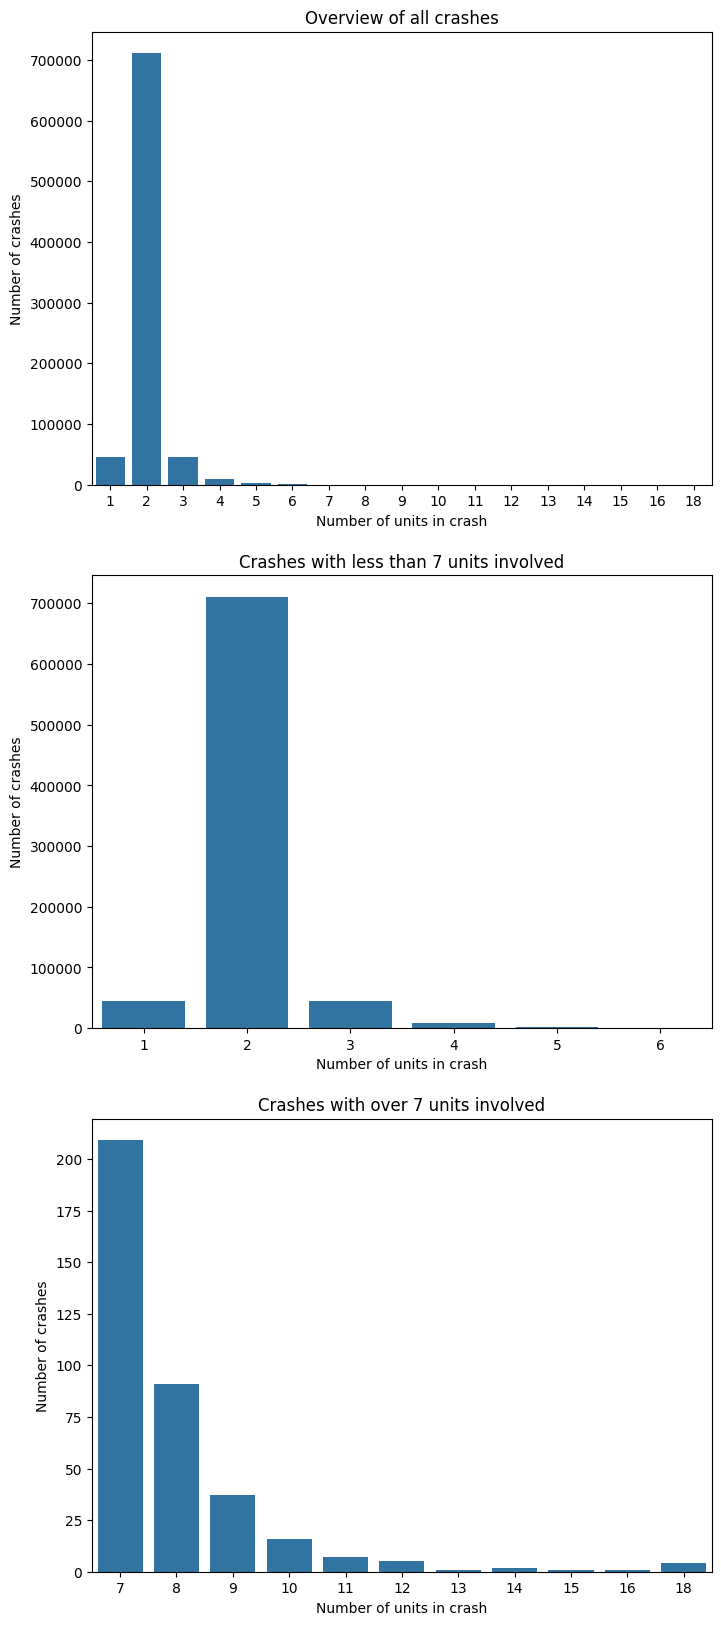

In [2]:
crashes_df = pd.read_csv('../data/chicago.csv')
num_units_count = crashes_df.groupby('NUM_UNITS')['NUM_UNITS'].count()

# splitting the dataframe into two 
split_counts = lambda b : crashes_df[b].groupby('NUM_UNITS')['NUM_UNITS'].count()
num_units_below_t = split_counts(crashes_df['NUM_UNITS'] < 7)
num_units_above_t = split_counts(crashes_df['NUM_UNITS'] >= 7)

figure, ax = plt.subplots(3, 1, figsize=(8,20))

# creating the plots
plot_1 = sns.barplot(num_units_count, ax=ax[0])
plot_2 = sns.barplot(num_units_below_t, ax=ax[1])
plot_3 = sns.barplot(num_units_above_t, ax=ax[2])

# function to set the labels and titles for each plot
def set_plot_styles(plot, title):
    plot.set_title(title)
    plot.set_ylabel('Number of crashes')
    plot.set_xlabel('Number of units in crash')

set_plot_styles(plot_1, 'Overview of all crashes')
set_plot_styles(plot_2, 'Crashes with less than 7 units involved')
set_plot_styles(plot_3, 'Crashes with over 7 units involved')
plt.show()

### 2.2) EDA Pie charts of weather conditions in crashes (by Jackson Weisner)

(description)

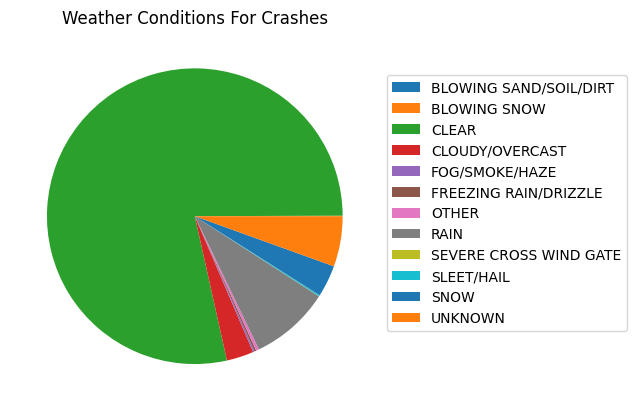

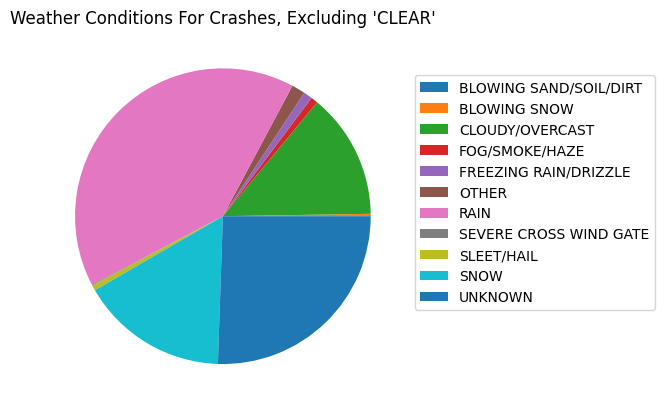

In [3]:
# creating a dataframe that is grouped by weather condition
weather_condition_counts = crashes_df.groupby('WEATHER_CONDITION')['WEATHER_CONDITION'].count()
weather_excluding_clear = crashes_df[crashes_df['WEATHER_CONDITION'] != 'CLEAR'].groupby('WEATHER_CONDITION')['WEATHER_CONDITION'].count()

# creating a list of keys for the charts 
keys = [
    'BLOWING SAND/SOIL/DIRT',
    'BLOWING SNOW',
    'CLEAR',
    'CLOUDY/OVERCAST',
    'FOG/SMOKE/HAZE',
    'FREEZING RAIN/DRIZZLE',
    'OTHER',
    'RAIN',
    'SEVERE CROSS WIND GATE',
    'SLEET/HAIL',
    'SNOW',
    'UNKNOWN',
]


# plotting the two pie charts
plt.figure(0)
plt.pie(weather_condition_counts, labels=None)
plt.legend(keys, bbox_to_anchor=(1,0.9))
plt.title('Weather Conditions For Crashes')

plt.figure(1)
plt.pie(weather_excluding_clear, labels=None)
keys.remove("CLEAR")
plt.legend(keys, bbox_to_anchor=(1,0.9))
plt.title('Weather Conditions For Crashes, Excluding \'CLEAR\'')

plt.show()
del crashes_df

### 2.3) EDA of Age and Gender (by Erica Hammond)

The following charts display the relationship between certain driver characteristics and traffic collisions.

In [4]:
people_df = pd.read_csv('../data/chicago_people.csv', low_memory=False)

### 2.4) EDA of age distribution involved in crashes (by Erica Hammond)

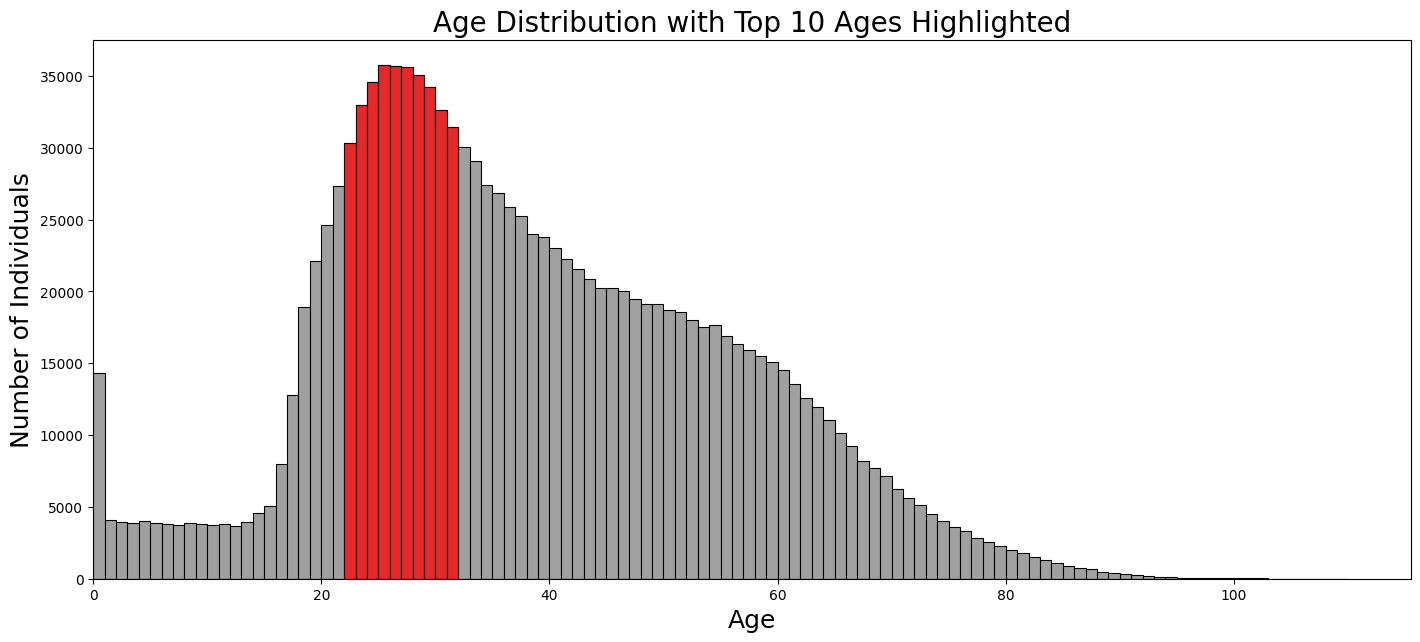

In [5]:
# Age Distribution
ages = people_df['AGE']

ages = ages[ages >= 0]

# top 10 
age_counts = pd.Series(ages).value_counts()
top_10_ages = age_counts.head(10).index

plt.figure(figsize=(17, 7))

# histogram
sns.histplot(ages, bins=range(int(ages.min()), int(ages.max()) + 1), color='grey', kde=False)

# highlights
sns.histplot([age for age in ages if age in top_10_ages], bins=range(int(ages.min()), int(ages.max()) + 1), color='red', kde=False)
# sns.histplot([age for age in ages if age == 0], bins=range(int(ages.min()), int(ages.max()) + 1), color='black', kde=False)
# originally was going to label 0 as unknown age but realized it could indicate a high(er) number of crashes involving infants < 1 year old


plt.title('Age Distribution with Top 10 Ages Highlighted', fontsize=20)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Number of Individuals', fontsize=18)
plt.xlim(left=0)

plt.show()

# I don't know why it turned ugly... it was good earlier. I'll fix at a later date if needed.

### 2.5) EDA of Gender distribution involved in crashes (by Erica Hammond)

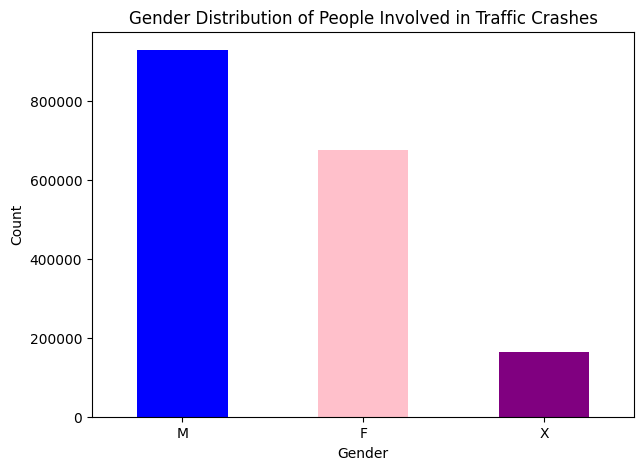

In [6]:
# Gender distribution
gender_counts = people_df['SEX'].value_counts()
gender_colors = {'M': 'blue', 'F': 'pink', 'X': 'purple'}

plt.figure(figsize=(7, 5))
gender_counts.plot(kind='bar', color=[gender_colors[gender] for gender in gender_counts.index])
plt.title('Gender Distribution of People Involved in Traffic Crashes')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

### 2.6) EDA of Age x Gender (by Erica Hammond)

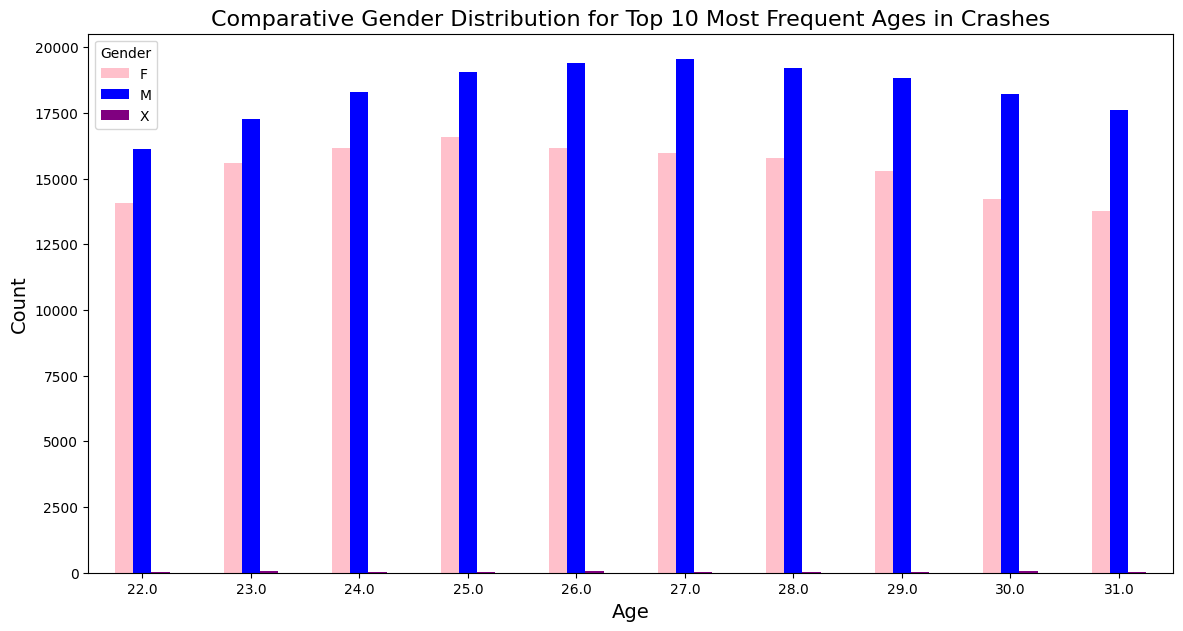

In [7]:
# Gender distribution of the top 10 most frequent ages
age_data = people_df['AGE']
gender_data = people_df['SEX'].value_counts()
top_10_ages = people_df['AGE'].value_counts().head(10).index

# rows with ages in the top 10
top_10_df = people_df[people_df['AGE'].isin(top_10_ages)]

# group by 'AGE' and 'SEX'
grouped_data = top_10_df.groupby(['AGE', 'SEX']).size().unstack(fill_value=0)

colors = {'M': 'blue', 'F': 'pink', 'X': 'purple'}
grouped_data.plot(kind='bar', stacked=False, figsize=(14, 7), color=[colors[sex] for sex in grouped_data.columns])

plt.title('Comparative Gender Distribution for Top 10 Most Frequent Ages in Crashes', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Gender')

plt.show()
del people_df

### 2.6.1) EDA of Age x Gender (by Erica Hammond)

/tmp/ipykernel_15029/349944511.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=driver_actions.index, y=driver_actions.values, palette="viridis")


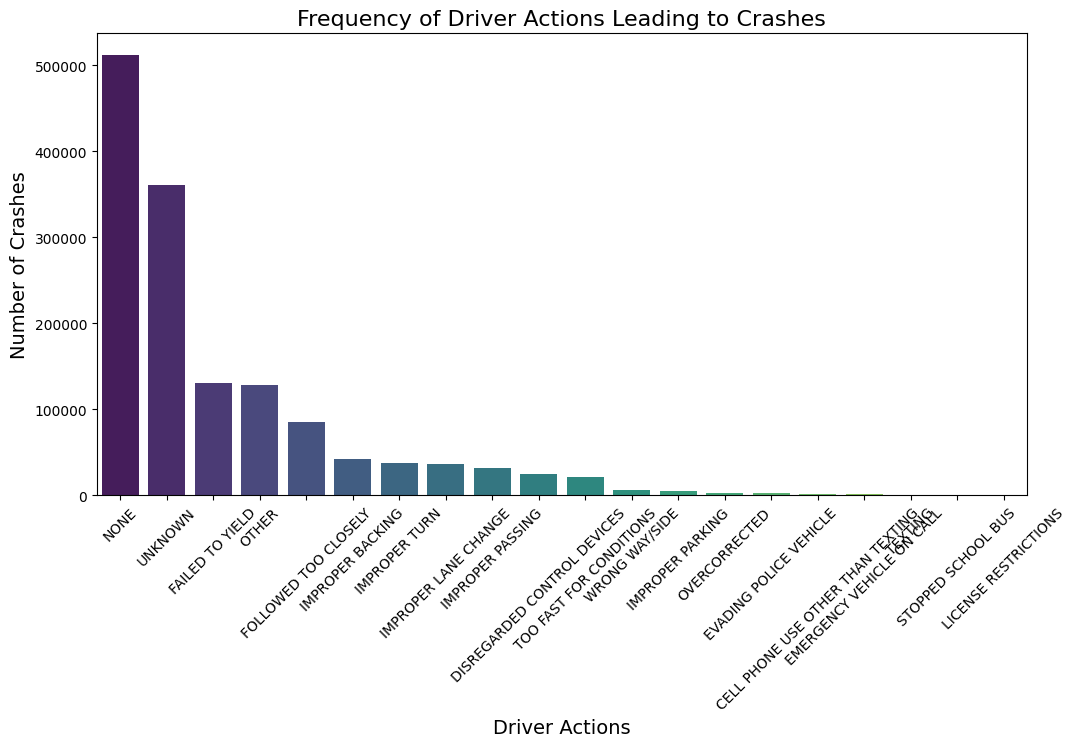

In [8]:
people_df = pd.read_csv('../data/chicago_people.csv', low_memory=False)


# Count the occurrences of each driver action
driver_actions = people_df['DRIVER_ACTION'].value_counts()

# Plotting the distribution of driver actions
plt.figure(figsize=(12, 6))
sns.barplot(x=driver_actions.index, y=driver_actions.values, palette="viridis")
plt.title('Frequency of Driver Actions Leading to Crashes', fontsize=16)
plt.xlabel('Driver Actions', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45)
plt.show()

From the above EDA we can determine that often crashes are through no fault of the driver, regardless of age/sex/gender.
However, it is worth exploring the situations in which it is to aid in determining how to minimize risk and injury.

### 2.7) EDA of Hit and Runs and Crash Times (by Mohammed Riaz)

(description)

/tmp/ipykernel_15029/1417449757.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_crashes['CRASH_DATE'] = pd.to_datetime(df_crashes['CRASH_DATE'])


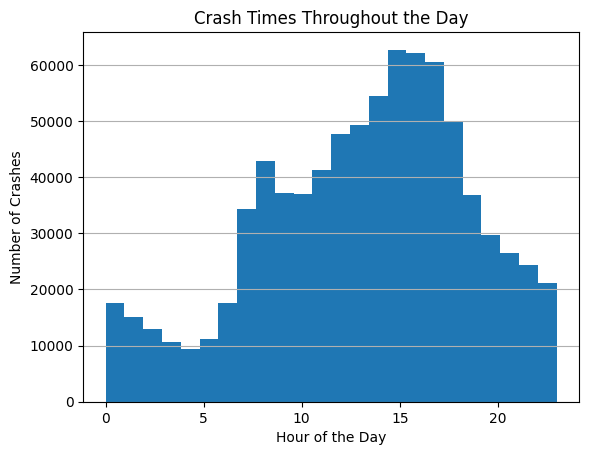

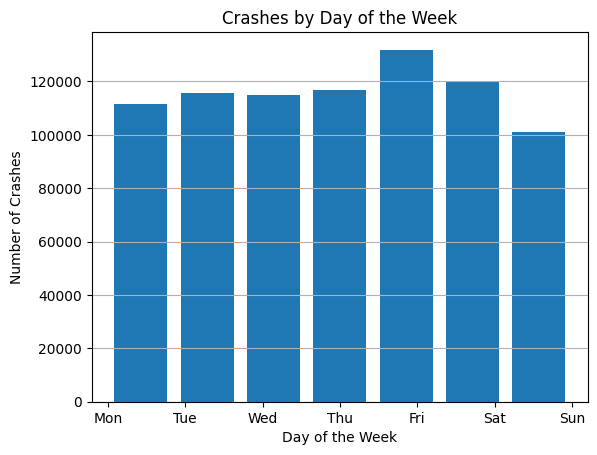

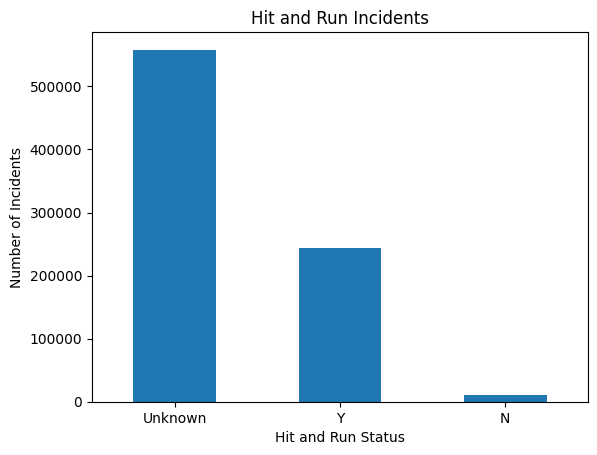

In [9]:
df_crashes = pd.read_csv('../data/chicago.csv')


df_crashes['CRASH_DATE'] = pd.to_datetime(df_crashes['CRASH_DATE'])

# Histogram of the hour of day when crashes occur
df_crashes['CRASH_HOUR'] = df_crashes['CRASH_DATE'].dt.hour
df_crashes['CRASH_HOUR'].plot(kind='hist', bins=24, title='Crash Times Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.grid(axis='y')
plt.show()

# Histogram of the day of the week when crashes occur
df_crashes['CRASH_DAY_OF_WEEK'] = df_crashes['CRASH_DATE'].dt.dayofweek
df_crashes['CRASH_DAY_OF_WEEK'].plot(kind='hist', bins=7, rwidth=0.8, title='Crashes by Day of the Week')
plt.xlabel('Day of the Week')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Number of Crashes')
plt.grid(axis='y')
plt.show()

# Bar chart for hit and runs
df_crashes['HIT_AND_RUN_I'] = df_crashes['HIT_AND_RUN_I'].fillna('Unknown')

hit_and_run_counts = df_crashes['HIT_AND_RUN_I'].value_counts()

hit_and_run_counts.plot(kind='bar', title='Hit and Run Incidents')
plt.xlabel('Hit and Run Status')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)  # Rotate labels to make them readable

plt.show()
del df_crashes

### 2.8) EDA of lighting conditions when crashes occur (by Prit Patel)

(description)

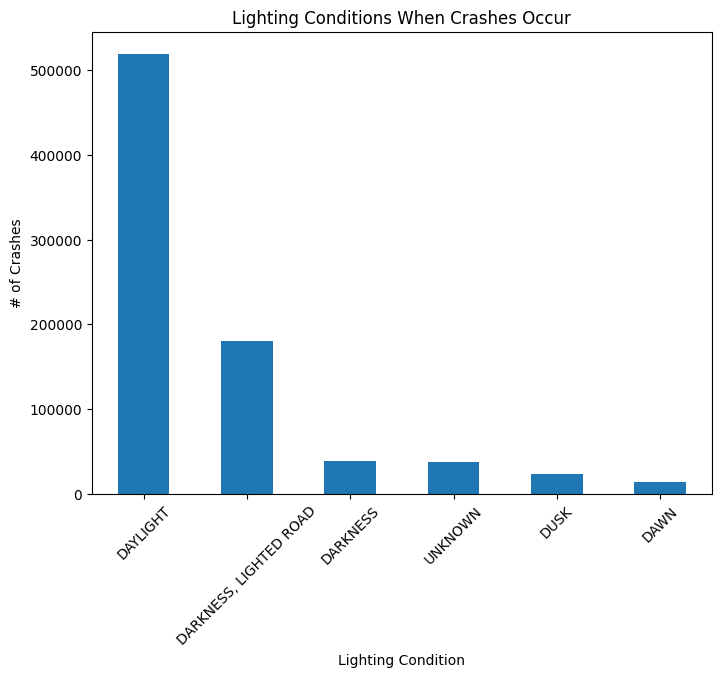

In [10]:
# Loading data from Prit's laptop
traffic_crashes = pd.read_csv('../data/chicago.csv', low_memory=False)

l = traffic_crashes['LIGHTING_CONDITION']
lighting = l.value_counts()

# Create histogram
plt.figure(figsize=(8, 6))
lighting.plot(kind='bar')

plt.title('Lighting Conditions When Crashes Occur')
plt.xlabel('Lighting Condition')
plt.ylabel('# of Crashes')
plt.xticks(rotation=45)
del traffic_crashes

### 2.9) EDA of Crash Frequency by Hour of Day (by Junah Liu)

In [11]:
crashes_df = pd.read_csv('../data/chicago.csv')

In [12]:
crashes_df['DATE_POLICE_NOTIFIED'] = pd.to_datetime(crashes_df['DATE_POLICE_NOTIFIED'])

/tmp/ipykernel_15029/3455780565.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crashes_df['DATE_POLICE_NOTIFIED'] = pd.to_datetime(crashes_df['DATE_POLICE_NOTIFIED'])


In [13]:
crashes_df['DATE_POLICE_NOTIFIED'].head()

0   2023-09-05 19:05:00
1   2023-09-22 18:50:00
2   2023-07-29 14:45:00
3   2023-08-09 23:40:00
4   2023-08-18 12:55:00
Name: DATE_POLICE_NOTIFIED, dtype: datetime64[ns]

In [14]:
crashes_df['NOTIFIED_HOUR'] = crashes_df['DATE_POLICE_NOTIFIED'].dt.hour

In [15]:
hourly_crashes = crashes_df.groupby('NOTIFIED_HOUR').size()

In [16]:
print(hourly_crashes)

NOTIFIED_HOUR
0     15772
1     12038
2     10223
3      8113
4      6798
5      6916
6     11165
7     22034
8     36607
9     40060
10    42423
11    45338
12    46046
13    50782
14    52816
15    62955
16    69148
17    65582
18    57683
19    45750
20    32736
21    27233
22    22953
23    21192
dtype: int64


## 2.10) EDA of crash Frequency by Hour of Day (by Junah Liu)

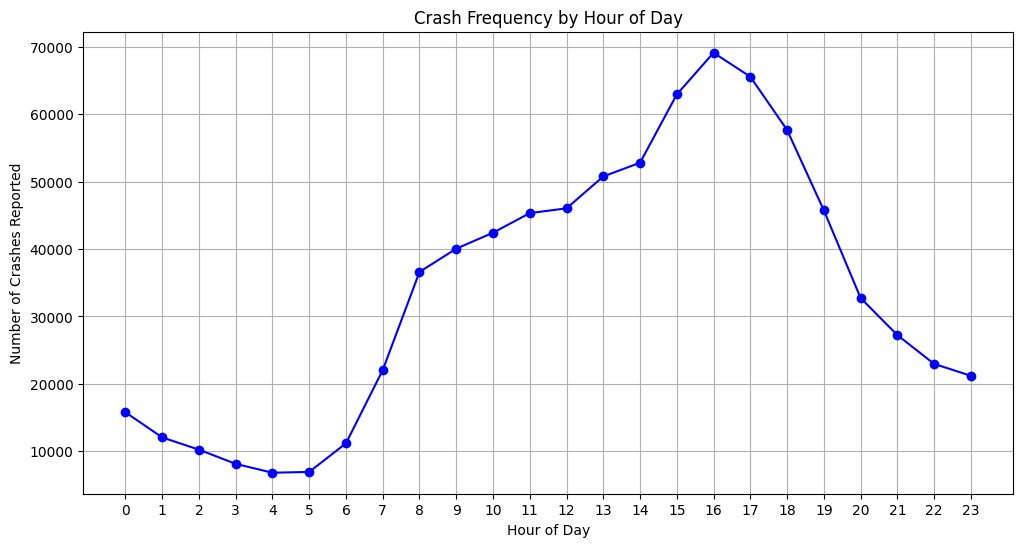

In [17]:
# Plotting
plt.figure(figsize=(12, 6))

# line plot
plt.plot(hourly_crashes.index, hourly_crashes.values, marker='o', linestyle='-', color='b')
plt.title('Crash Frequency by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes Reported')
plt.xticks(range(0, 24))
plt.grid(True)

The line graph shows that crash frequency rises sharply from early morning, peaking between 2 PM and 5 PM, then gradually declines during the night.

### 2.11) EDA of Crash Counts by Day of the Week (by Junah Liu)

Crash Counts by Day of the Week:
DAY_NAME
Monday       118051
Tuesday      118374
Wednesday    116625
Thursday     116795
Friday       127363
Saturday     116323
Sunday        98832
Name: count, dtype: int64


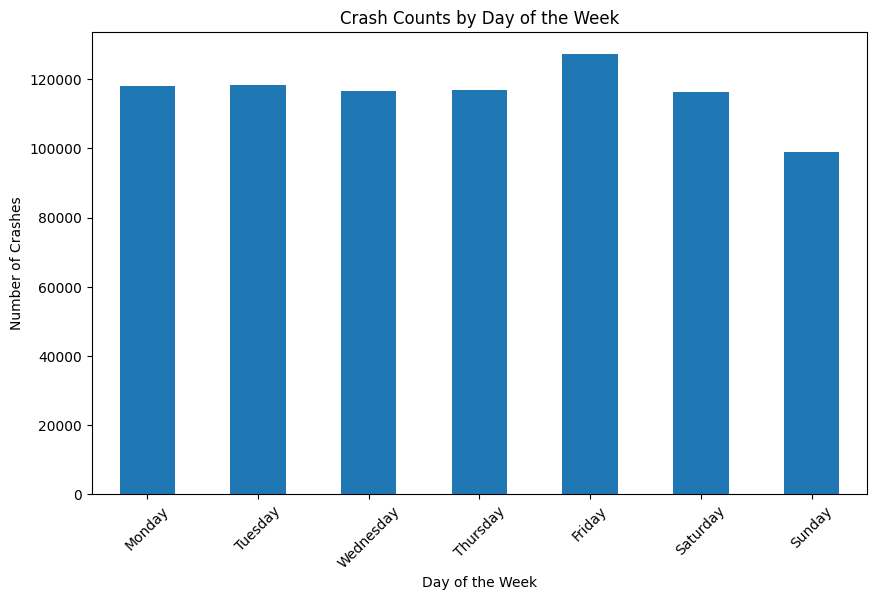

In [18]:
# Extract day of week and hour from 'DATE_POLICE_NOTIFIED'
crashes_df['DAY_OF_WEEK'] = crashes_df['DATE_POLICE_NOTIFIED'].dt.dayofweek
crashes_df['HOUR'] = crashes_df['DATE_POLICE_NOTIFIED'].dt.hour

# Map the 'DAY_OF_WEEK' numerical values to day names
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
crashes_df['DAY_NAME'] = crashes_df['DAY_OF_WEEK'].map(day_names)

# Display crash counts by day name
dayofweek_counts_named = crashes_df['DAY_NAME'].value_counts().reindex(day_names.values())
print("Crash Counts by Day of the Week:")
print(dayofweek_counts_named)

# Visualize crash counts by day of the week with day names
plt.figure(figsize=(10, 6))
dayofweek_counts_named.plot(kind='bar')
plt.title('Crash Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show()

The bar chart illustrates that crash counts are relatively consistent across weekdays, with a slight increase on Fridays. Notably, the weekend shows a reduction in crashes, with Sunday having the lowest count.

# **3.0) Hypotheses**

# **3.1) Visualization 1 (by Junha Liu)**

### Hypothesis 1:

## Heatmap of Crash Frequency by Day of Week and Hour

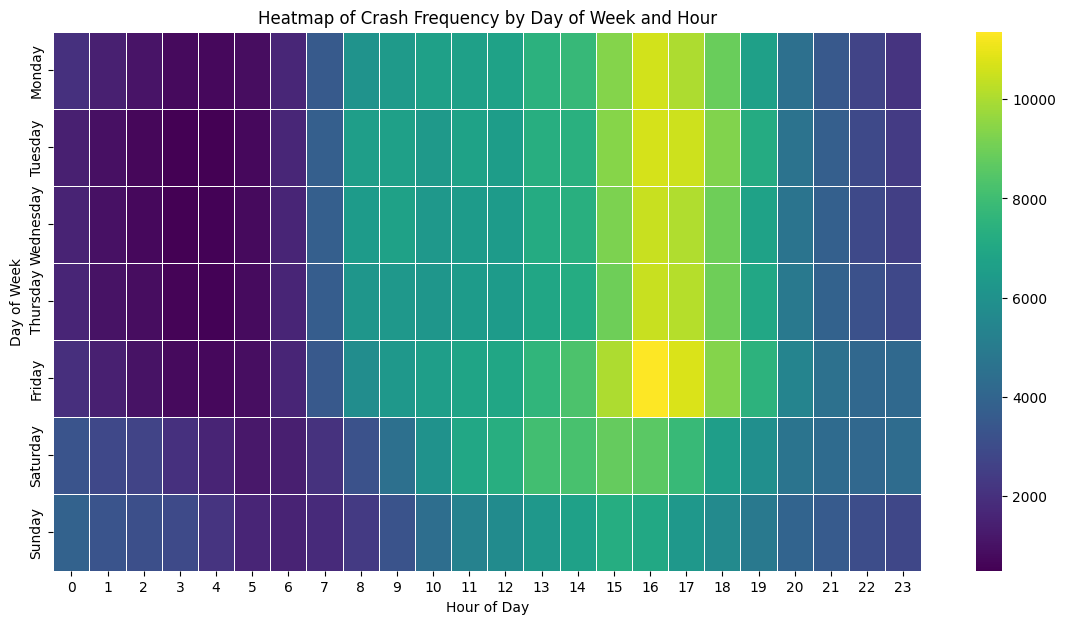

In [19]:
# Pivot table to aggregate crash counts by day name and hour
pivot_table = crashes_df.pivot_table(index='DAY_NAME', columns='HOUR', values='CRASH_RECORD_ID', aggfunc='count', fill_value=0)
pivot_table = pivot_table.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table, cmap='viridis', linewidths=.5)
plt.title('Heatmap of Crash Frequency by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

The heatmap indicates a peak in crash frequency on weekday near 3 PM. Early mornings across all days consistently show the lowest crash frequencies, highlighting safer periods for driving.

## Daily Crash Counts Over Time

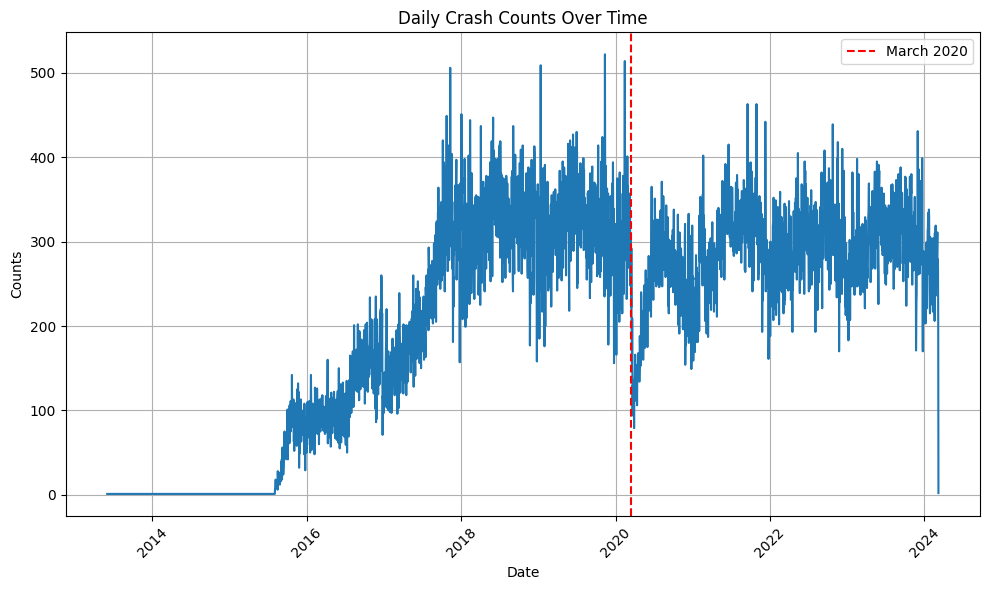

In [20]:
crashes_df['DATE'] = crashes_df['DATE_POLICE_NOTIFIED'].dt.date
crashes_by_date = crashes_df.groupby('DATE').size().reset_index(name='counts')

plt.figure(figsize=(10, 6))
plt.plot(crashes_by_date['DATE'], crashes_by_date['counts'])
plt.title('Daily Crash Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.grid(True)

# Highlight March 2020
march_2020_start = pd.to_datetime('2020-03-15')
plt.axvline(x=march_2020_start, color='red', linestyle='--', label='March 2020')

plt.legend()
plt.tight_layout()
plt.show()
del crashes_df

The data reveals a significant decrease in traffic crashes around March 2020, coinciding with the onset of COVID-19 related shutdowns and restrictions. This period marked a global shift towards remote work, reduced travel, and the temporary closure of many workplaces, leading to substantially less traffic on the roads. The reduced traffic volume directly contributed to fewer traffic collisions, highlighting how changes in societal behavior and mobility patterns can have a pronounced impact on road safety. This observation underscores the importance of considering external factors, such as public health crises, in traffic and urban planning to enhance road safety outcomes.

# **3.2) Visualization 2 (by Jackson Weisner)**

### Hypothesis 1:
Collisons in conditions other than 'CLEAR' are more likely to have fatal injuries.

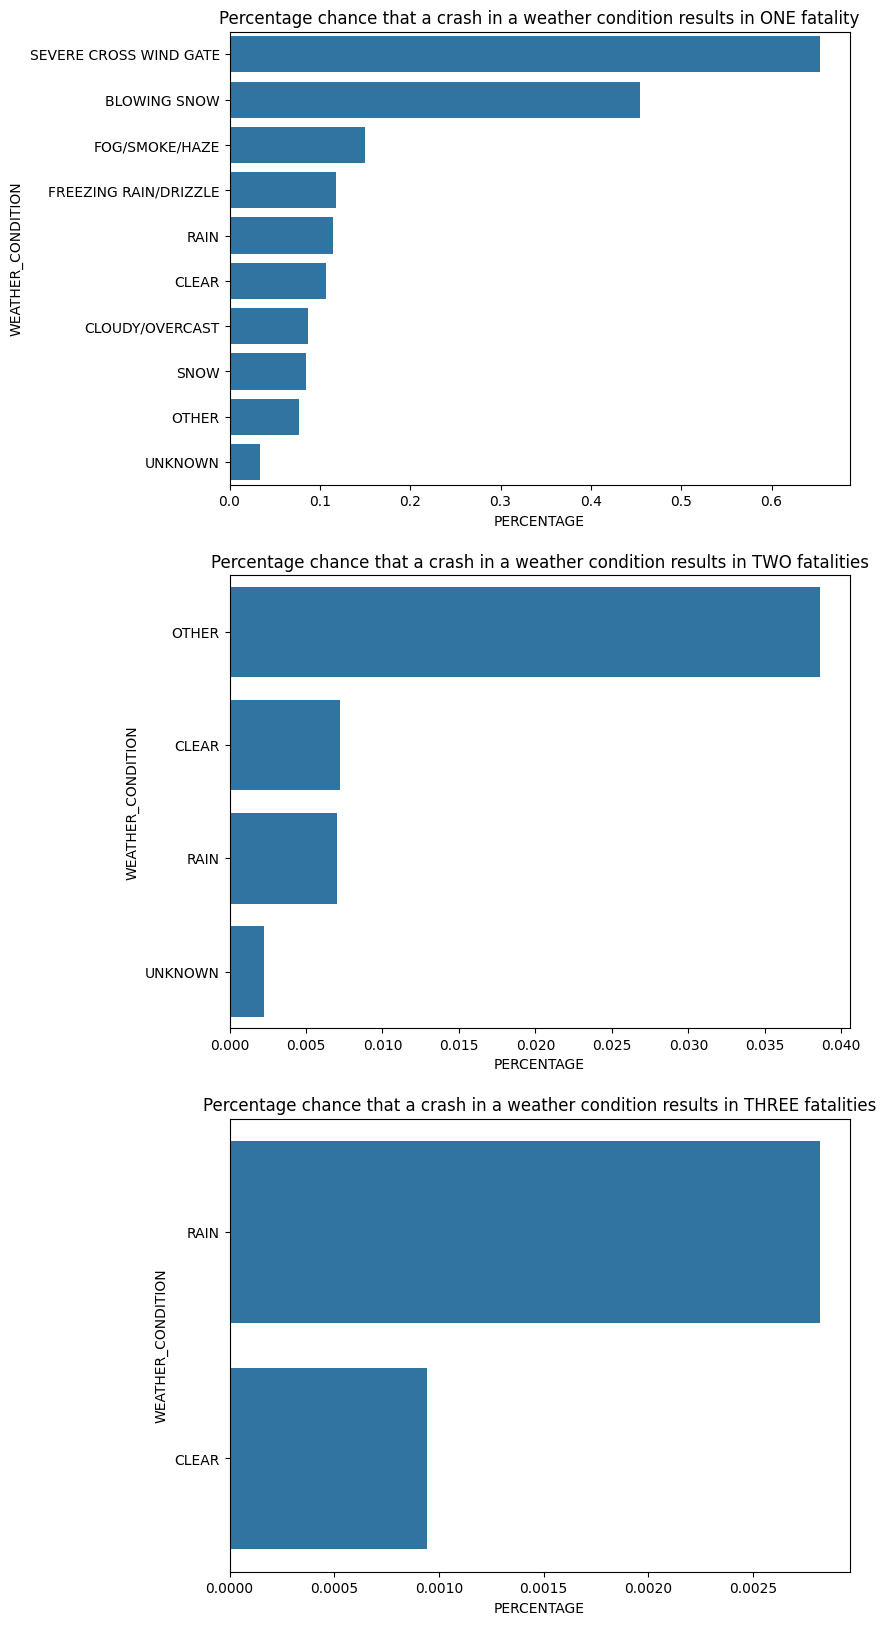

In [21]:
crashes_df = pd.read_csv('../data/chicago.csv', low_memory=False)
crash_weather = crashes_df.groupby('WEATHER_CONDITION')

total_per_condition = crash_weather['WEATHER_CONDITION'].count().to_frame()
total_per_condition = total_per_condition.rename(columns={'WEATHER_CONDITION':'TOTAL'}).reset_index()

# function that creates dataframes where the number of fatal injuries is above a certain threshold
def create_percentage_df(lambd):
    fatal_weather = crashes_df.loc[lambd(crashes_df['INJURIES_FATAL']), ['INJURIES_FATAL', 'WEATHER_CONDITION']].groupby('WEATHER_CONDITION').count()
    fatal_percenteges = pd.merge(total_per_condition, fatal_weather, how='outer', on='WEATHER_CONDITION')
    fatal_percenteges['PERCENTAGE'] = (fatal_percenteges['INJURIES_FATAL'] / fatal_percenteges['TOTAL']) * 100
    fatal_percenteges = fatal_percenteges.dropna().sort_values(by='PERCENTAGE', ascending=False)
    return fatal_percenteges

one_fatality = create_percentage_df(lambda v : v == 1.0)
two_fatalities = create_percentage_df(lambda v : v == 2.0)
three_fatalities = create_percentage_df(lambda v : v == 3.0)


figure, ax = plt.subplots(3, 1, figsize=(8,20))

# styling and plotting the three barplots
plot_1 = sns.barplot(one_fatality, y='WEATHER_CONDITION', x='PERCENTAGE', ax=ax[0], orient='h')
plot_2 = sns.barplot(two_fatalities, y='WEATHER_CONDITION', x='PERCENTAGE', ax=ax[1], orient='h')
plot_3 = sns.barplot(three_fatalities, y='WEATHER_CONDITION', x='PERCENTAGE', ax=ax[2], orient='h')

plot_1.set_title('Percentage chance that a crash in a weather condition results in ONE fatality')
plot_2.set_title('Percentage chance that a crash in a weather condition results in TWO fatalities')
plot_3.set_title('Percentage chance that a crash in a weather condition results in THREE fatalities')

plt.show()
del crashes_df

## Conclusion:
From my analysis I observed the percent chance that a crash in a certain weather condition results in fatal injuries. The weather condition with the highest chance for one fatal injury is ‘SEVERE CROSS WIND GATE’ with approximately 0.6% chance, this is almost six times more than the percent chance for a single fatal injury in ‘CLEAR’ weather conditions. Out of the ten conditions the median conditions were ‘CLEAR’ and ‘RAIN’ when looking at the percent chance for a single fatal injury. 

The second graph looks at the percent chance that a crash in a certain weather condition results in two fatal injuries. The chances are about a factor of ten lower than the chance for a single fatality. Besides ‘OTHER’, ‘CLEAR’ is the most likely to result in two fatal injuries, which is interesting because it was not as likely compared to the other conditions in the previous graph.

The third graph looks at the percent chance that a crash in a certain weather condition results in three fatal injuries. This had less data to analyze, and the percent chance was another factor of 10 lower than the previous graph. But the ‘RAIN’ condition was much more likely to result in three fatal injuries than the ‘CLEAR’ condition.

According to my analysis, the ‘CLEAR’ condition is not the least dangerous condition in terms of fatal injuries, but it is also not the safest condition. This supports my hypothesis.


# **3.3) Visualization 3 (by Prit Patel)**

### Hypothesis 3: 
Injuries will vary depending on the lighting condition. Dark light conditions will have a greater percentage of serious injuries. 

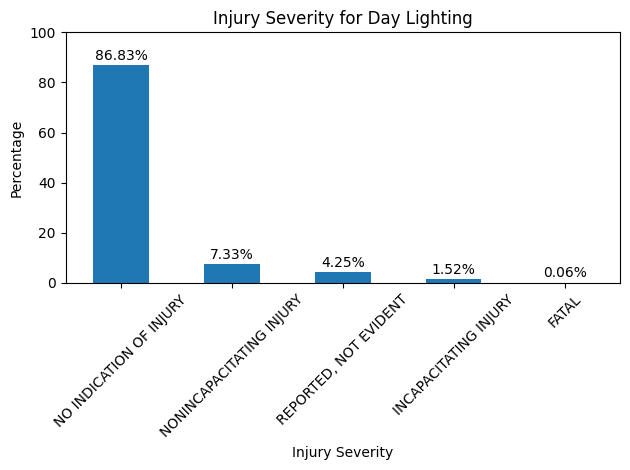

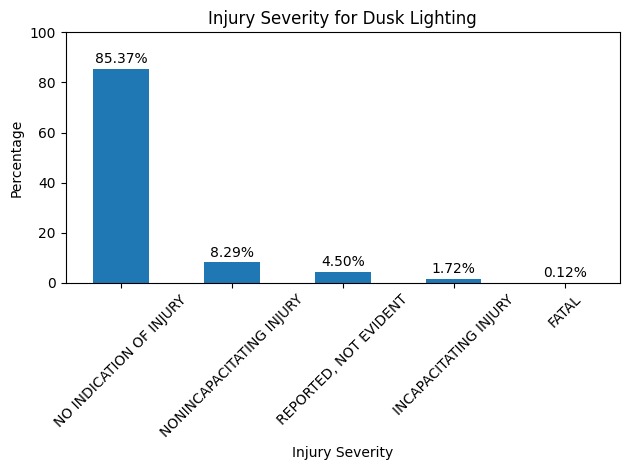

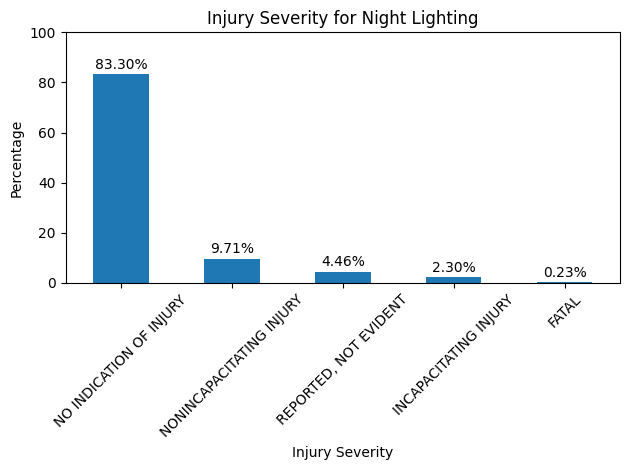

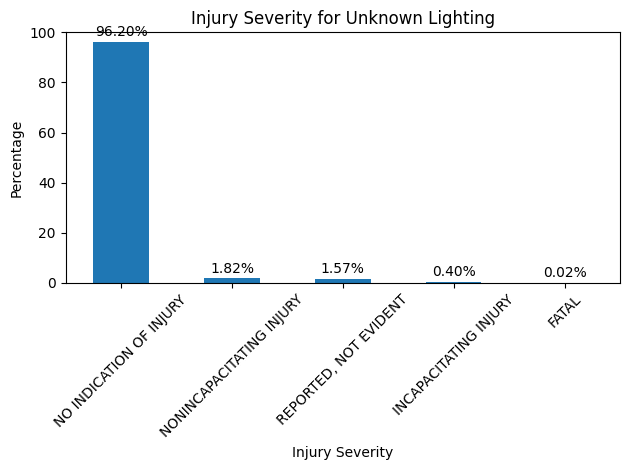

In [22]:
traffic_crashes = pd.read_csv('../data/chicago.csv', low_memory=False)
injury_severity = traffic_crashes['MOST_SEVERE_INJURY']
lighting_conditions = traffic_crashes['LIGHTING_CONDITION']
combined = pd.merge(lighting_conditions, injury_severity, left_index=True, right_index=True)

types = {
    'DAYLIGHT': 'Day',
    'DUSK': 'Dusk',
    'DARKNESS, LIGHTED ROAD': 'Night',
    'DARKNESS': 'Night',
    'UNKNOWN': 'Unknown'
}

combined['Lighting_Category'] = combined['LIGHTING_CONDITION'].map(types)

for type in ['Day', 'Dusk', 'Night', 'Unknown']:
    each_type = combined[combined['Lighting_Category'] == type]
    count = each_type['MOST_SEVERE_INJURY'].value_counts(normalize=True) * 100
    count.plot(kind='bar')

    plt.title(f'Injury Severity for {type} Lighting')
    plt.xlabel('Injury Severity')
    plt.ylabel('Percentage')

    for i, v in enumerate(count):
        plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

del traffic_crashes

### Conclusion: 
The data that is found suppports the hypothesis. Severity of injury increases as darkness increases. The likeliness for a fatal injury in the dark is almost 4x the amount in the day and incapacitating injury is 2 times more likely. This is understandable as it is easier to view road and traffic conditions in the daytime compared to the night time light conditions. 

# **3.4) Visualization 4 (by Mohammed Riaz)**

### Hypothesis 4:
Adverse roadway conditions will increase the likeliness an accident takes place due to some primary contributing causes. (Icy, snowy, wet conditions vs. Dry conditions)

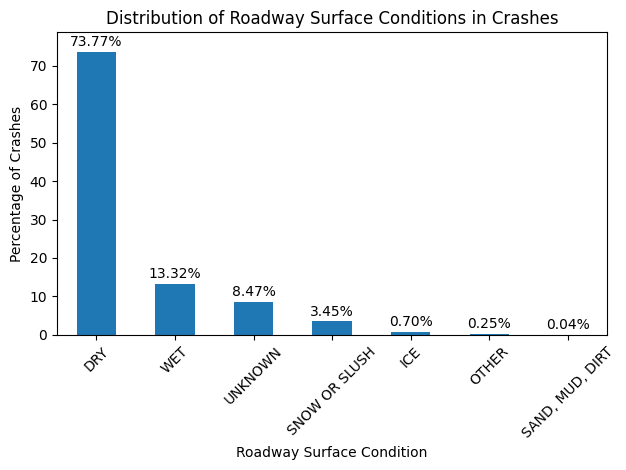

In [23]:
crashes_df = pd.read_csv('../data/chicago.csv', low_memory=False)
roadway_surface_counts = crashes_df['ROADWAY_SURFACE_COND'].value_counts()
total = roadway_surface_counts.sum()
percentage = (roadway_surface_counts / total) * 100 

ax = percentage.plot(kind='bar')
plt.title('Distribution of Roadway Surface Conditions in Crashes')
plt.xlabel('Roadway Surface Condition')
plt.ylabel('Percentage of Crashes')
plt.xticks(rotation=45)  

plt.ylim(0, percentage.max() + 5)  

for i, v in enumerate(percentage):
    ax.text(i, v + (percentage.max() * 0.01), f"{v:.2f}%", ha='center', va='bottom')  # Adjust the position for the text

plt.tight_layout() 
plt.show()
del crashes_df

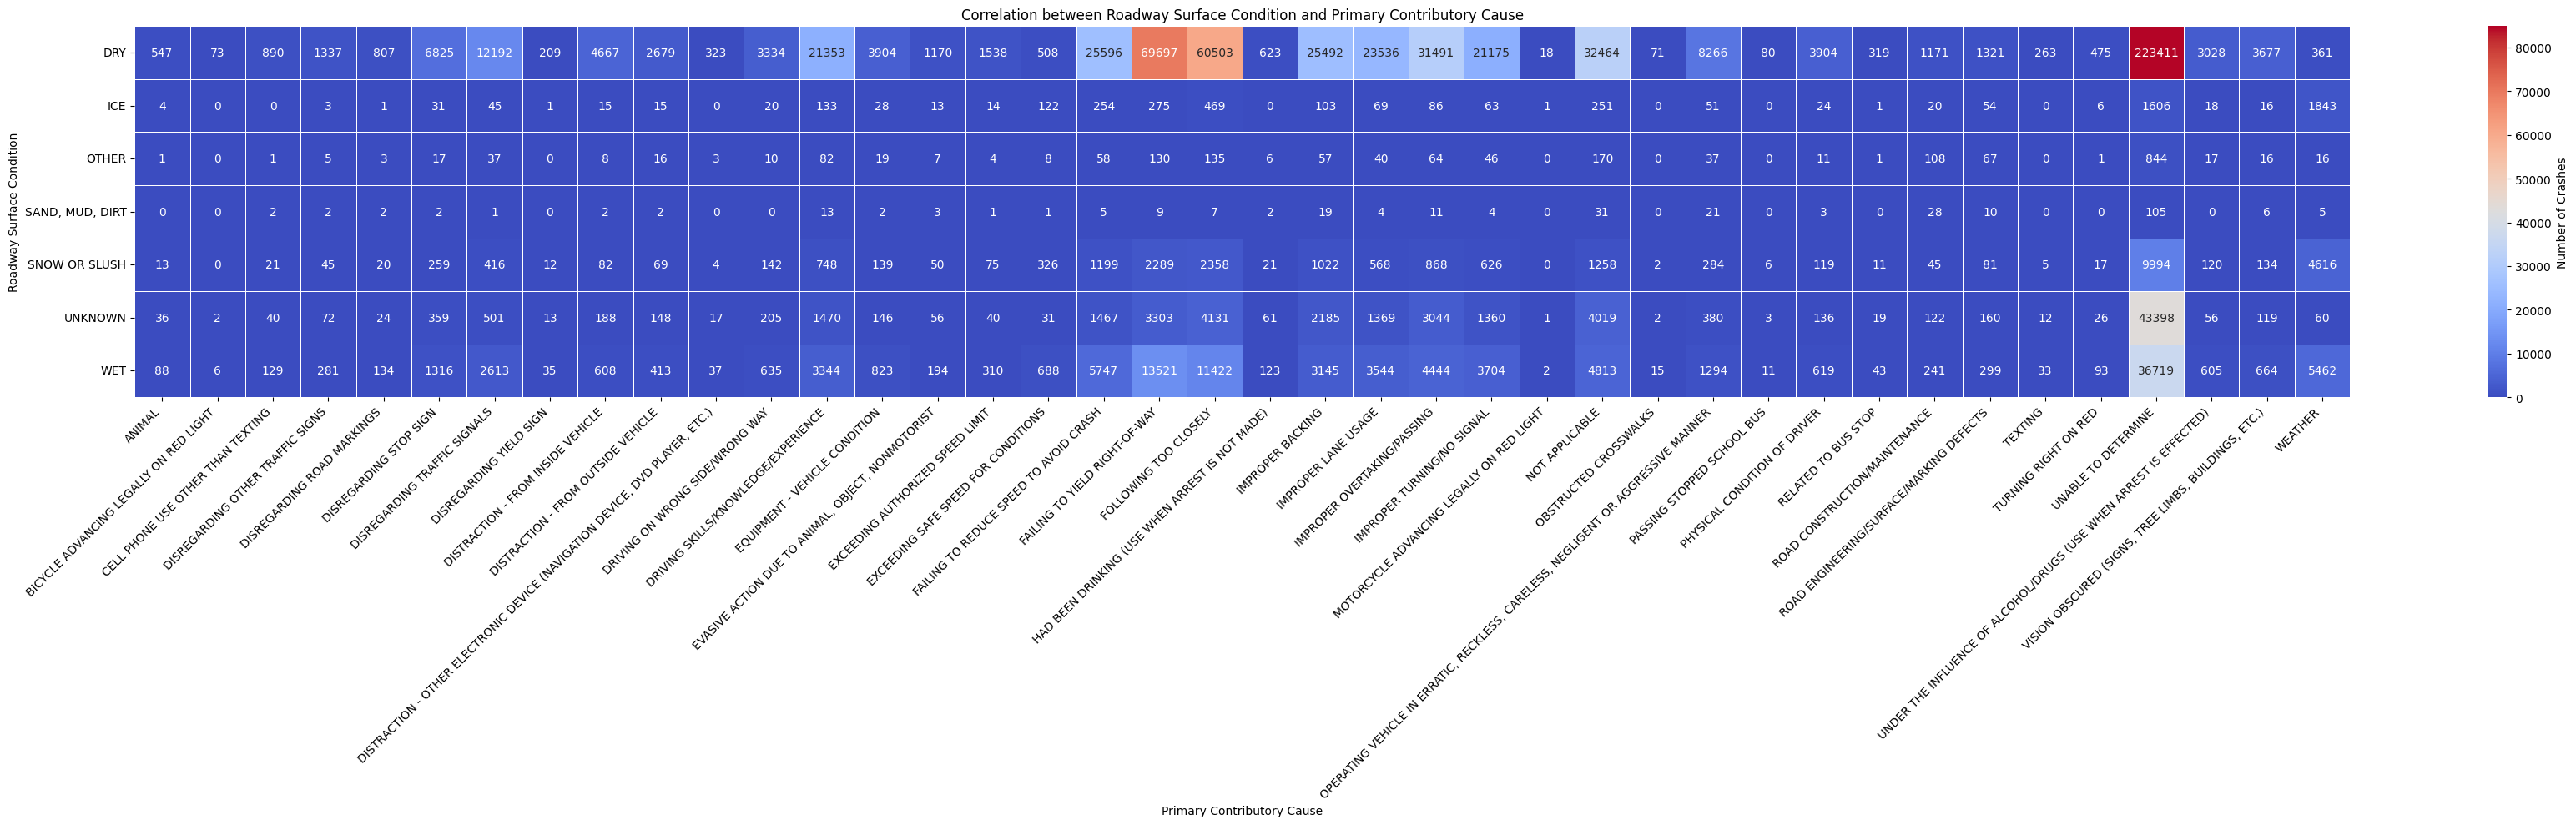

In [24]:
df_new_crashes = pd.read_csv('../data/chicago.csv')
crosstab = pd.crosstab(df_new_crashes['ROADWAY_SURFACE_COND'], df_new_crashes['PRIM_CONTRIBUTORY_CAUSE'])

vmax_setting = crosstab.values.max() * .38

plt.figure(figsize=(35, 10))

sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm', linewidths=.5, vmax=vmax_setting, cbar_kws={'label': 'Number of Crashes'})

plt.title('Correlation between Roadway Surface Condition and Primary Contributory Cause')
plt.ylabel('Roadway Surface Condition')
plt.xlabel('Primary Contributory Cause')
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0) 

plt.tight_layout() 
plt.show()



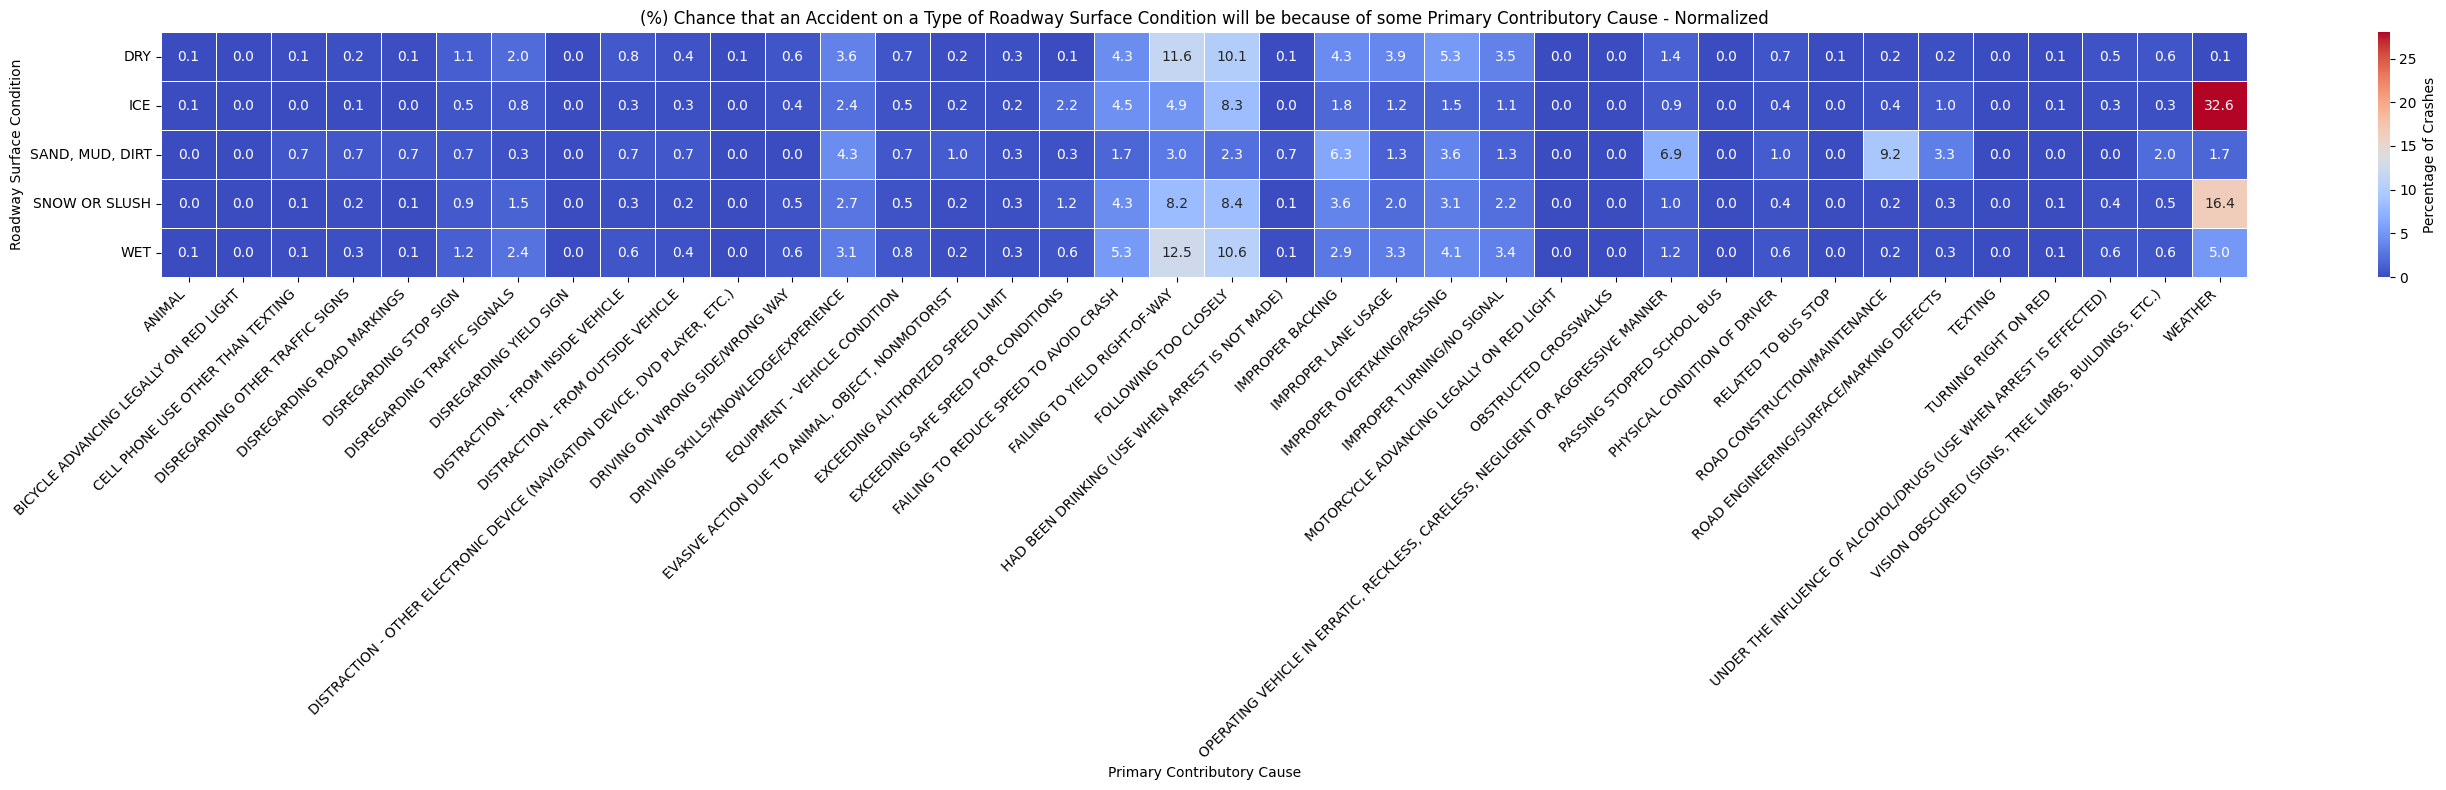

In [25]:
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0) * 100 
crosstab_normalized = crosstab_normalized.drop(columns=['UNABLE TO DETERMINE'], errors='ignore')
crosstab_normalized = crosstab_normalized.drop(columns=['NOT APPLICABLE'], errors='ignore')
crosstab_normalized = crosstab_normalized.drop(columns=['UNKNOWN'], errors='ignore')
crosstab_normalized = crosstab_normalized.drop('UNKNOWN', axis=0, errors='ignore')
crosstab_normalized = crosstab_normalized.drop('OTHER', axis=0, errors='ignore')

plt.figure(figsize=(28, 8))
sns.heatmap(crosstab_normalized, annot=True, fmt=".1f", cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Percentage of Crashes'}, vmax = 28)
plt.title('(%) Chance that an Accident on a Type of Roadway Surface Condition will be because of some Primary Contributory Cause - Normalized')
plt.ylabel('Roadway Surface Condition')
plt.xlabel('Primary Contributory Cause')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
del df_new_crashes

## Conclusion:

Based on the analysis performed, my hypothesis is indeed supported by the data. Although there are far more cases of traffic accidents in dry conditions, if we normalize this data set and look at the percentage of accidents that take place due to some primary contributing cause, we can see that there are a larger amount of normalized incidents that take place due to various primary contributing causes in adverse conditions. This data is normalized as a percentage of all contributing causes over a given roadway condition. For example, we can see that failing to yield right of way is a more common contributing cause in wet conditions than in dry conditions. This is a similar finding in the case of following too closely. Thus, my hypothesis is supported for at least some primary contributing being more likely in the case of adverse road conditions. 

# **3.5) Visualization 5 (by Erica Hammond)**

### Hypothesis 5:

Based of the initial data analysis in which we learned that men were most likely to be involved in traffic accidents, particularly men aged 22-31, the hypothesis would be that men are most likely involved in the greatest number of fatal accidents as well.

In [26]:
#just printing the first few rows of People for my edification, can delete later
people_df = pd.read_csv('../data/chicago_people.csv', low_memory=False)
column_names_df = pd.DataFrame(people_df.columns, columns=['Column Names'])
print("Column Names:")
display(column_names_df)

print("\nFirst 10 Rows:")
display(people_df.head(10))

Column Names:


Column Names
0               PERSON_ID
1             PERSON_TYPE
2         CRASH_RECORD_ID
3              VEHICLE_ID
4              CRASH_DATE
5                 SEAT_NO
6                    CITY
7                   STATE
8                 ZIPCODE
9                     SEX
10                    AGE
11  DRIVERS_LICENSE_STATE
12  DRIVERS_LICENSE_CLASS
13       SAFETY_EQUIPMENT
14        AIRBAG_DEPLOYED
15               EJECTION
16  INJURY_CLASSIFICATION
17               HOSPITAL
18             EMS_AGENCY
19             EMS_RUN_NO
20          DRIVER_ACTION
21          DRIVER_VISION
22     PHYSICAL_CONDITION
23        PEDPEDAL_ACTION
24    PEDPEDAL_VISIBILITY
25      PEDPEDAL_LOCATION
26             BAC_RESULT
27       BAC_RESULT VALUE
28         CELL_PHONE_USE


First 10 Rows:


PERSON_ID PERSON_TYPE                                    CRASH_RECORD_ID  \
0   O749947      DRIVER  81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...   
1   O871921      DRIVER  af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...   
2    O10018      DRIVER  71162af7bf22799b776547132ebf134b5b438dcf3dac6b...   
3    O10038      DRIVER  c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...   
4    O10039      DRIVER  eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...   
5    O10041      DRIVER  dd1bce4bd6d0be4c247714dcabab44e6563c62b913229b...   
6    O10062      DRIVER  4bd2ee6bb306902b99a9c2ae55cf4fcffec00879e39759...   
7    O10066      DRIVER  9c03b6fcc6d72cf3ee2cb9ea754ea7e4617ab965142552...   
8     O1007      DRIVER  2e7e0c1682100a200a46c25a532eda4febb00a2ae49ea9...   
9    O10088      DRIVER  8bf8069b3d839b732fd35d2c9d8caddeddbb4b8978e84d...   

   VEHICLE_ID              CRASH_DATE  SEAT_NO     CITY STATE ZIPCODE SEX  \
0    834816.0  09/28/2019 03:30:00 AM      NaN  CHICAGO    IL   60651   M   
1    827212.0  04/13/2020 10:50:00 PM      NaN  CHICAGO    IL   60620   M   
2      9579.0  11/01/2015 05:00:00 AM      NaN      NaN   NaN     NaN   X   
3      9598.0  11/01/2015 08:00:00 AM      NaN      NaN   NaN     NaN   X   
4      9600.0  11/01/2015 10:15:00 AM      NaN      NaN   NaN     NaN   X   
5      9601.0  11/01/2015 11:00:00 AM      NaN      NaN   NaN     NaN   X   
6      9621.0  11/01/2015 12:30:00 PM      NaN      NaN   NaN     NaN   X   
7      9623.0  10/31/2015 04:00:00 PM      NaN      NaN   NaN     NaN   X   
8       958.0  09/02/2015 02:35:00 PM      NaN      NaN   NaN     NaN   X   
9      9645.0  11/01/2015 01:00:00 PM      NaN      NaN   NaN     NaN   X   

   ...  EMS_RUN_NO     DRIVER_ACTION DRIVER_VISION PHYSICAL_CONDITION  \
0  ...         NaN           UNKNOWN       UNKNOWN            UNKNOWN   
1  ...         NaN              NONE  NOT OBSCURED             NORMAL   
2  ...         NaN  IMPROPER BACKING       UNKNOWN            UNKNOWN   
3  ...         NaN           UNKNOWN       UNKNOWN            UNKNOWN   
4  ...         NaN           UNKNOWN       UNKNOWN            UNKNOWN   
5  ...         NaN           UNKNOWN       UNKNOWN            UNKNOWN   
6  ...         NaN           UNKNOWN       UNKNOWN            UNKNOWN   
7  ...         NaN           UNKNOWN       UNKNOWN            UNKNOWN   
8  ...         NaN           UNKNOWN       UNKNOWN            UNKNOWN   
9  ...         NaN           UNKNOWN       UNKNOWN            UNKNOWN   

  PEDPEDAL_ACTION PEDPEDAL_VISIBILITY PEDPEDAL_LOCATION        BAC_RESULT  \
0             NaN                 NaN               NaN  TEST NOT OFFERED   
1             NaN                 NaN               NaN  TEST NOT OFFERED   
2             NaN                 NaN               NaN  TEST NOT OFFERED   
3             NaN                 NaN               NaN  TEST NOT OFFERED   
4             NaN                 NaN               NaN  TEST NOT OFFERED   
5             NaN                 NaN               NaN  TEST NOT OFFERED   
6             NaN                 NaN               NaN  TEST NOT OFFERED   
7             NaN                 NaN               NaN  TEST NOT OFFERED   
8             NaN                 NaN               NaN  TEST NOT OFFERED   
9             NaN                 NaN               NaN  TEST NOT OFFERED   

  BAC_RESULT VALUE CELL_PHONE_USE  
0              NaN            NaN  
1              NaN            NaN  
2              NaN            NaN  
3              NaN            NaN  
4              NaN            NaN  
5              NaN            NaN  
6              NaN            NaN  
7              NaN            NaN  
8              NaN            NaN  
9              NaN            NaN  

[10 rows x 29 columns]

In [27]:
# print first 10 rows of Crashes
crashes_df = pd.read_csv('../data/chicago.csv', low_memory=False)
column_names_df = pd.DataFrame(crashes_df.columns, columns=['Column Names'])
print("Column Names:")
display(column_names_df)

print("\nFirst 10 Rows:")
display(crashes_df.head(10))

Column Names:


Column Names
0                 CRASH_RECORD_ID
1                CRASH_DATE_EST_I
2                      CRASH_DATE
3              POSTED_SPEED_LIMIT
4          TRAFFIC_CONTROL_DEVICE
5                DEVICE_CONDITION
6               WEATHER_CONDITION
7              LIGHTING_CONDITION
8                FIRST_CRASH_TYPE
9                 TRAFFICWAY_TYPE
10                       LANE_CNT
11                      ALIGNMENT
12           ROADWAY_SURFACE_COND
13                    ROAD_DEFECT
14                    REPORT_TYPE
15                     CRASH_TYPE
16         INTERSECTION_RELATED_I
17             NOT_RIGHT_OF_WAY_I
18                  HIT_AND_RUN_I
19                         DAMAGE
20           DATE_POLICE_NOTIFIED
21        PRIM_CONTRIBUTORY_CAUSE
22         SEC_CONTRIBUTORY_CAUSE
23                      STREET_NO
24               STREET_DIRECTION
25                    STREET_NAME
26             BEAT_OF_OCCURRENCE
27                 PHOTOS_TAKEN_I
28             STATEMENTS_TAKEN_I
29                      DOORING_I
30                    WORK_ZONE_I
31                 WORK_ZONE_TYPE
32              WORKERS_PRESENT_I
33                      NUM_UNITS
34             MOST_SEVERE_INJURY
35                 INJURIES_TOTAL
36                 INJURIES_FATAL
37        INJURIES_INCAPACITATING
38    INJURIES_NON_INCAPACITATING
39  INJURIES_REPORTED_NOT_EVIDENT
40         INJURIES_NO_INDICATION
41               INJURIES_UNKNOWN
42                     CRASH_HOUR
43              CRASH_DAY_OF_WEEK
44                    CRASH_MONTH
45                       LATITUDE
46                      LONGITUDE
47                       LOCATION


First 10 Rows:


CRASH_RECORD_ID CRASH_DATE_EST_I  \
0  23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...              NaN   
1  2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...              NaN   
2  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...              NaN   
3  7ebf015016f83d09b321afd671a836d6b148330535d5df...              NaN   
4  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...              NaN   
5  004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...              NaN   
6  35156ce97cab22747495e92e8bbb16c57e0e60dc3ce6d1...              NaN   
7  359bf9f5872d646bb63576e55b1e0b480dc93c2b935ab5...              NaN   
8  36360857c079418cba1b1d70cf653595bbfb4566de8fcb...                Y   
9  37a215843a67b9d2118972242e0ab68232583ffe20401f...              NaN   

               CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0  09/05/2023 07:05:00 PM                  30         TRAFFIC SIGNAL   
1  09/22/2023 06:45:00 PM                  50            NO CONTROLS   
2  07/29/2023 02:45:00 PM                  30         TRAFFIC SIGNAL   
3  08/09/2023 11:00:00 PM                  30            NO CONTROLS   
4  08/18/2023 12:50:00 PM                  15                  OTHER   
5  11/26/2019 08:38:00 AM                  25            NO CONTROLS   
6  02/06/2023 05:30:00 PM                  30            NO CONTROLS   
7  01/31/2022 07:45:00 PM                  25            NO CONTROLS   
8  01/01/2022 04:32:00 PM                  10            NO CONTROLS   
9  10/18/2020 03:58:00 PM                  35            NO CONTROLS   

       DEVICE_CONDITION WEATHER_CONDITION      LIGHTING_CONDITION  \
0  FUNCTIONING PROPERLY             CLEAR                    DUSK   
1           NO CONTROLS             CLEAR  DARKNESS, LIGHTED ROAD   
2  FUNCTIONING PROPERLY             CLEAR                DAYLIGHT   
3           NO CONTROLS             CLEAR  DARKNESS, LIGHTED ROAD   
4  FUNCTIONING PROPERLY             CLEAR                DAYLIGHT   
5           NO CONTROLS             CLEAR                DAYLIGHT   
6           NO CONTROLS             CLEAR  DARKNESS, LIGHTED ROAD   
7           NO CONTROLS             CLEAR                DARKNESS   
8           NO CONTROLS              SNOW  DARKNESS, LIGHTED ROAD   
9           NO CONTROLS              RAIN                DAYLIGHT   

           FIRST_CRASH_TYPE                  TRAFFICWAY_TYPE  ...  \
0                     ANGLE              FIVE POINT, OR MORE  ...   
1                  REAR END       DIVIDED - W/MEDIAN BARRIER  ...   
2      PARKED MOTOR VEHICLE  DIVIDED - W/MEDIAN (NOT RAISED)  ...   
3  SIDESWIPE SAME DIRECTION                      NOT DIVIDED  ...   
4                  REAR END                            OTHER  ...   
5                PEDESTRIAN                          ONE-WAY  ...   
6                  REAR END                          ONE-WAY  ...   
7                  REAR END                          ONE-WAY  ...   
8                     ANGLE                      PARKING LOT  ...   
9              FIXED OBJECT       DIVIDED - W/MEDIAN BARRIER  ...   

   INJURIES_NON_INCAPACITATING INJURIES_REPORTED_NOT_EVIDENT  \
0                          2.0                           0.0   
1                          0.0                           0.0   
2                          0.0                           0.0   
3                          0.0                           0.0   
4                          1.0                           0.0   
5                          0.0                           0.0   
6                          0.0                           0.0   
7                          0.0                           0.0   
8                          0.0                           0.0   
9                          0.0                           0.0   

  INJURIES_NO_INDICATION INJURIES_UNKNOWN CRASH_HOUR CRASH_DAY_OF_WEEK  \
0                    2.0              0.0         19                 3   
1                    2.0              0.0         18               

The following scatterplot is a representation of all the available data concerning age, gender, and fatal injuries in relation to traffic accidents.

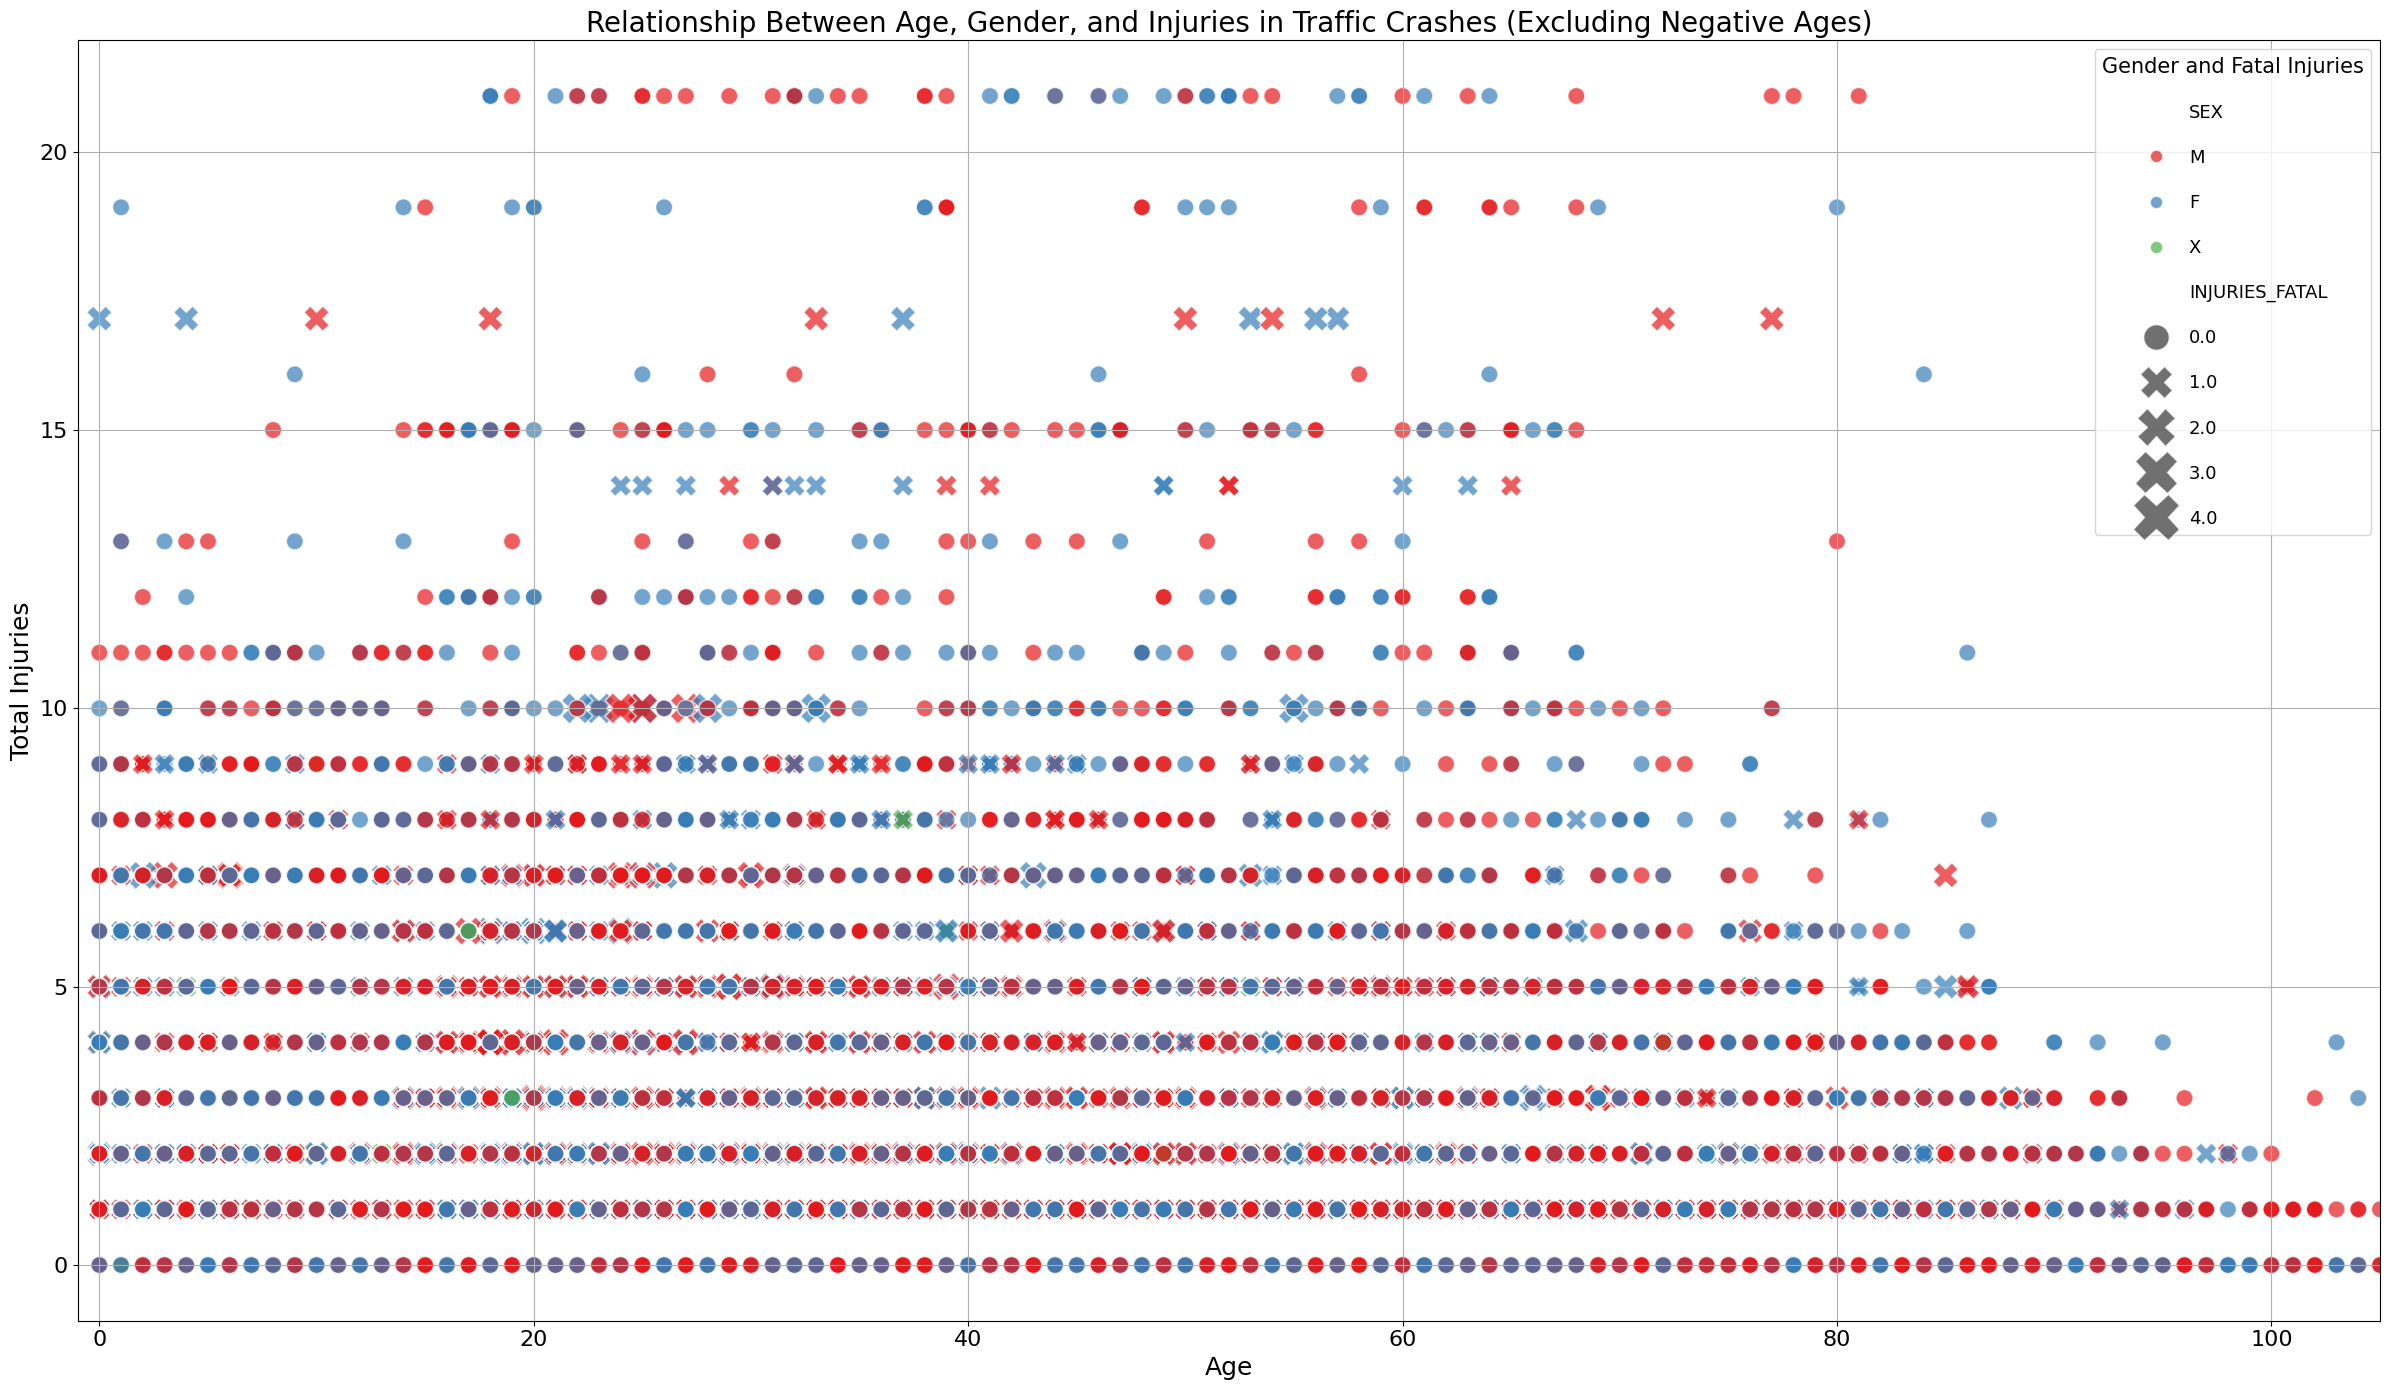

In [28]:
# ALL DATA

# first, merge on crash_record_id
merged_df = pd.merge(people_df, crashes_df, on='CRASH_RECORD_ID')
del people_df
del crashes_df
analysis_df = merged_df[["AGE", "SEX", "INJURIES_TOTAL", "INJURIES_FATAL"]]

filtered_df = analysis_df[analysis_df['AGE'] >= 0]

unique_fatal_injuries = filtered_df['INJURIES_FATAL'].unique()
markers = {value: 'X' if value > 0 else 'o' for value in unique_fatal_injuries}

# visualization parameters
plt.figure(figsize=(24, 14))
scatter_plot = sns.scatterplot(data=filtered_df, x="AGE", y="INJURIES_TOTAL", hue="SEX", style="INJURIES_FATAL", palette="Set1",
                               markers=markers, size="INJURIES_FATAL", sizes=(150, 500),
                               alpha=0.7)

plt.title('Relationship Between Age, Gender, and Injuries in Traffic Crashes (Excluding Negative Ages)', fontsize=20)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Total Injuries', fontsize=18)
plt.legend(title='Gender and Fatal Injuries', title_fontsize='15', fontsize='13', loc='upper right', labelspacing=1.5, markerscale=1.5)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

scatter_plot.set(xlim=(-1, 105), ylim=(-1, filtered_df['INJURIES_TOTAL'].max() + 1))

plt.tight_layout()

plt.show()

Since there is too much data to be readable, the below scatterplots determine the top 50 and the top 10 fatal accidents by age and gender.

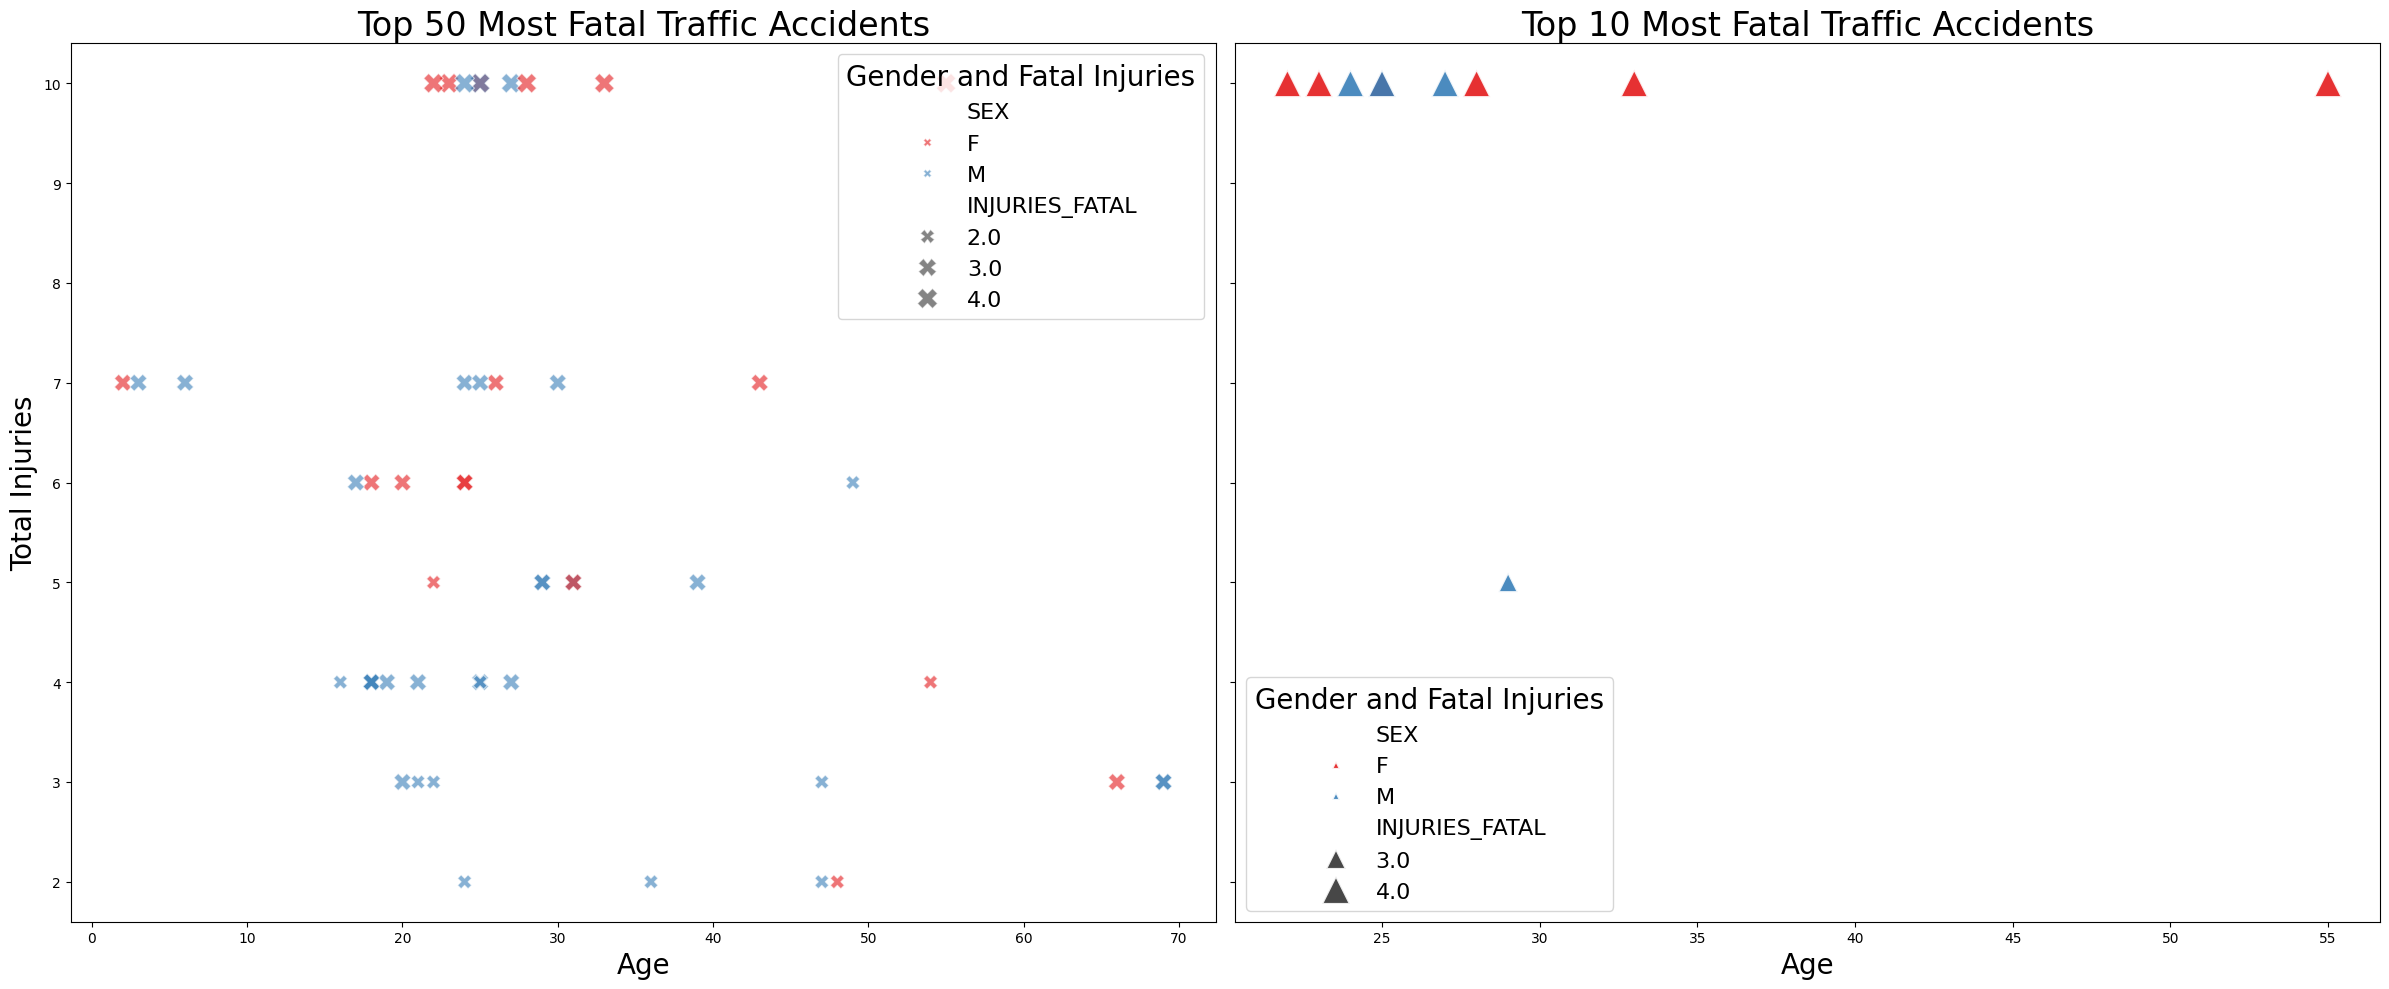

In [29]:
# two scatter plots to display the top 50 and top 10 most fatal accidents
sorted_df = filtered_df.sort_values('INJURIES_FATAL', ascending=False)

top_50_fatal_df = sorted_df.head(50)
top_10_fatal_df = top_50_fatal_df.head(10)

# Define markers
unique_markers = {value: 'X' if value > 0 else 'o' for value in sorted_df['INJURIES_FATAL'].unique()}
top_10_marker = '^'

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(24, 10), sharey=True)

# Top 50 most fatal accidents
sns.scatterplot(ax=axes[0], data=top_50_fatal_df, x="AGE", y="INJURIES_TOTAL", hue="SEX", style="INJURIES_FATAL",
                palette="Set1", markers=unique_markers, size="INJURIES_FATAL", sizes=(100, 200), alpha=0.6)

axes[0].set_title('Top 50 Most Fatal Traffic Accidents', fontsize=24)
axes[0].set_xlabel('Age', fontsize=20)
axes[0].set_ylabel('Total Injuries', fontsize=20)

# Top 10 most fatal accidents
sns.scatterplot(ax=axes[1], data=top_10_fatal_df, x="AGE", y="INJURIES_TOTAL", hue="SEX", style="INJURIES_FATAL",
                palette="Set1", markers={value: top_10_marker for value in top_10_fatal_df['INJURIES_FATAL'].unique()},
                size="INJURIES_FATAL", sizes=(200, 400), alpha=0.9)

axes[1].set_title('Top 10 Most Fatal Traffic Accidents', fontsize=24)
axes[1].set_xlabel('Age', fontsize=20)
# shares the y axis with the first plot

# legend and other settings
axes[0].legend(title='Gender and Fatal Injuries', title_fontsize='20', fontsize='16')
axes[1].legend(title='Gender and Fatal Injuries', title_fontsize='20', fontsize='16')
plt.tight_layout()

plt.show()

### Conclusion
The scatter plots reveal that the most fatal accidents do not necessarily concentrate around the 22-31 age group, as hypothesized. Instead, fatal accidents appear to be spread across a wider age range. This indicates that age may not be the sole or even primary predictor of fatality in accidents. Additionaly, the hypothesis suggested that men in the 22-31 age group would be most frequently involved in fatal accidents, but the data shows fatal accidents are more evenly distributed across different ages and both genders.
There is an obvious difference between being involved in an accident and being involved in a fatal accident. The hypothesis may still hold for overall involvement, but not when it comes to fatal accidents. The top 10 scatter plot, which should represent the most fatal accidents, shows sparse data points. This suggests that while fatalities do occur across different age groups, they are relatively rare events compared to overall accident involvement.

From the analysis, we can determine that age/gender are not enough on their own to inform policy. Perhaps we can delve into the multiple factors during the ML analysis.

# **4.0) Machine Learning Analyses**

# **4.1) Machine Learning analysis 1 (by Jackson Weisner)**

### Hypothesis 1:
Factors such as blood alcohol content, physical condition, and sex increase the chance of the person using their cell phone while driving.

In [30]:
from sklearn.metrics import accuracy_score
people_df = pd.read_csv("../data/chicago_people.csv", low_memory=False)

Decision Tree Classifier Accuracy: 0.6462882096069869


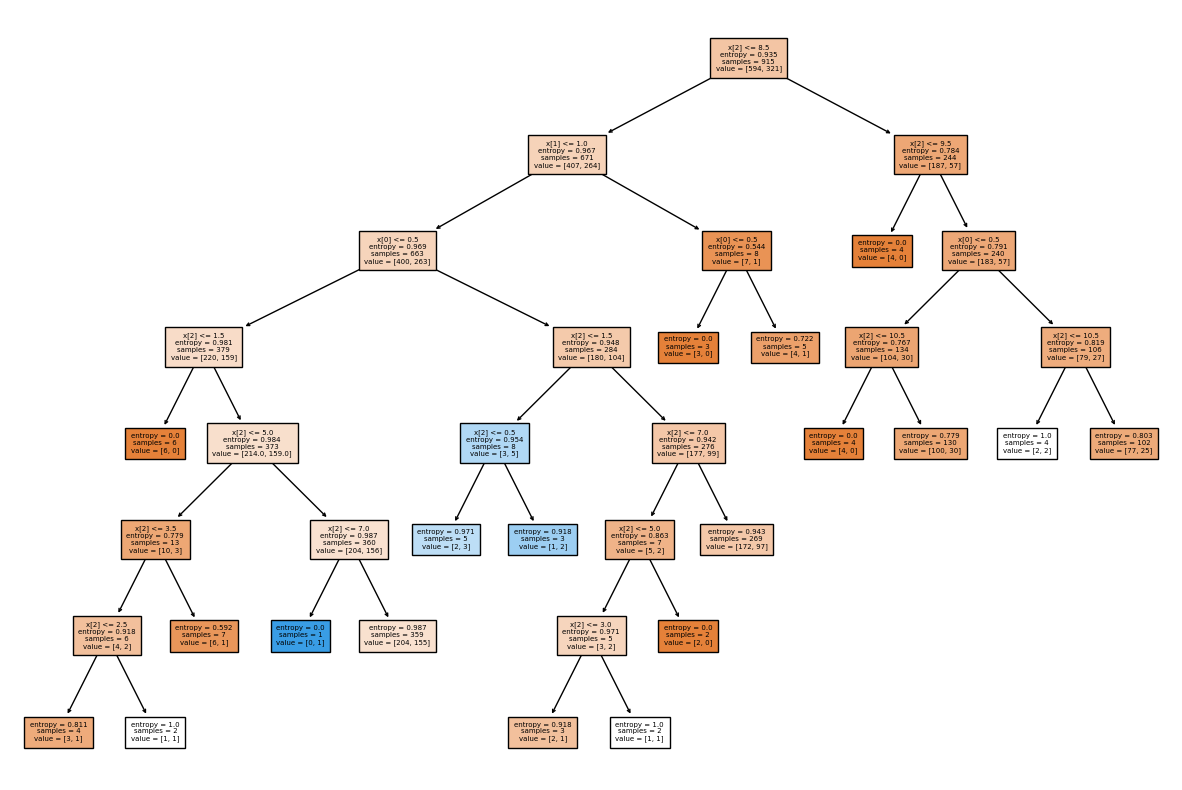

In [31]:
# list of features for the decision tree
features = ['SEX', 'BAC_RESULT VALUE', 'PHYSICAL_CONDITION']
value = ['CELL_PHONE_USE'] 


cleaned_df = people_df[features + value]

# cleaning and grouping the 'BAC_RESULT VALUE' column
upper_bound = 0.08
cleaned_df.loc[(cleaned_df['BAC_RESULT VALUE'] < upper_bound) & (cleaned_df['BAC_RESULT VALUE'] > 0.05), 'BAC_RESULT VALUE'] = 1
cleaned_df.loc[cleaned_df['BAC_RESULT VALUE'] >= upper_bound, 'BAC_RESULT VALUE'] = 2
cleaned_df.loc[:, 'BAC_RESULT VALUE'] = cleaned_df['BAC_RESULT VALUE'].fillna(0)
cleaned_df = cleaned_df.dropna()

# cleaning the 'PHYSICAL_CONDITION' column
conditions = ['EMOTIONAL','FATIGUED/ASLEEP','HAD BEEN DRINKING','ILLNESS/FAINTED',
            'IMPAIRED - ALCOHOL','IMPAIRED - ALCOHOL AND DRUGS','IMPAIRED - DRUGS',
            'MEDICATED','NORMAL','OTHER','REMOVED BY EMS','UNKNOWN']
i = 0
for option in conditions:
    cleaned_df.loc[cleaned_df['PHYSICAL_CONDITION'] == option, 'PHYSICAL_CONDITION'] = i
    i += 1

# cleaning the 'CELL_PHONE_USE' column
cleaned_df.loc[cleaned_df['CELL_PHONE_USE'] == 'Y', 'CELL_PHONE_USE'] = 0
cleaned_df.loc[cleaned_df['CELL_PHONE_USE'] == 'N', 'CELL_PHONE_USE'] = 1

# cleaning the 'SEX' column
cleaned_df = cleaned_df.drop(cleaned_df[cleaned_df['SEX'] == 'X'].index)
cleaned_df.loc[cleaned_df['SEX'] == 'M', 'SEX'] = 0
cleaned_df.loc[cleaned_df['SEX'] == 'F', 'SEX'] = 1

x = cleaned_df.loc[:, features].astype(int)
y = cleaned_df[value].astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# training the model
classifier = tree.DecisionTreeClassifier(criterion='entropy')
classifier = classifier.fit(x_train, y_train)
fig = plt.figure(figsize=(15,10))
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, classifier.predict(x_test)))

tree.plot_tree(classifier, fontsize=5, filled=True)
del people_df

### Conclusion:
My analysis using a decision tree resulted in an accuracy score of about 0.6, which is not the best, meaning the features can classify with moderate success. I used 'SEX', 'BAC_RESULT VALUE', and 'PHYSICAL_CONDITION' as my features to classify if 'CELL_PHONE_USE' was Y (0) or N (1). Doing so showed that was 15 out of 20 leaves were classified as 'CELL_PHONE_USE' = Y, meaning the majority of crashes will have cell phone use. Observing the decision tree shows that there is a correlation between 'SEX', 'BAC_RESULT VALUE', 'PHYSICAL_CONDITION' and the 'CELL_PHONE_USE'.

# 4.2) Machine Learning analysis 2 (by Mohammed Riaz)

### Hypothesis 2:
An exploration of what features are and are not associated with fatalities using logistic regression. 

accuracy: 0.9988490395327223 precision: 0.9976994037754419 recall: 0.9988490395327223 f1 score: 0.9982738906672787


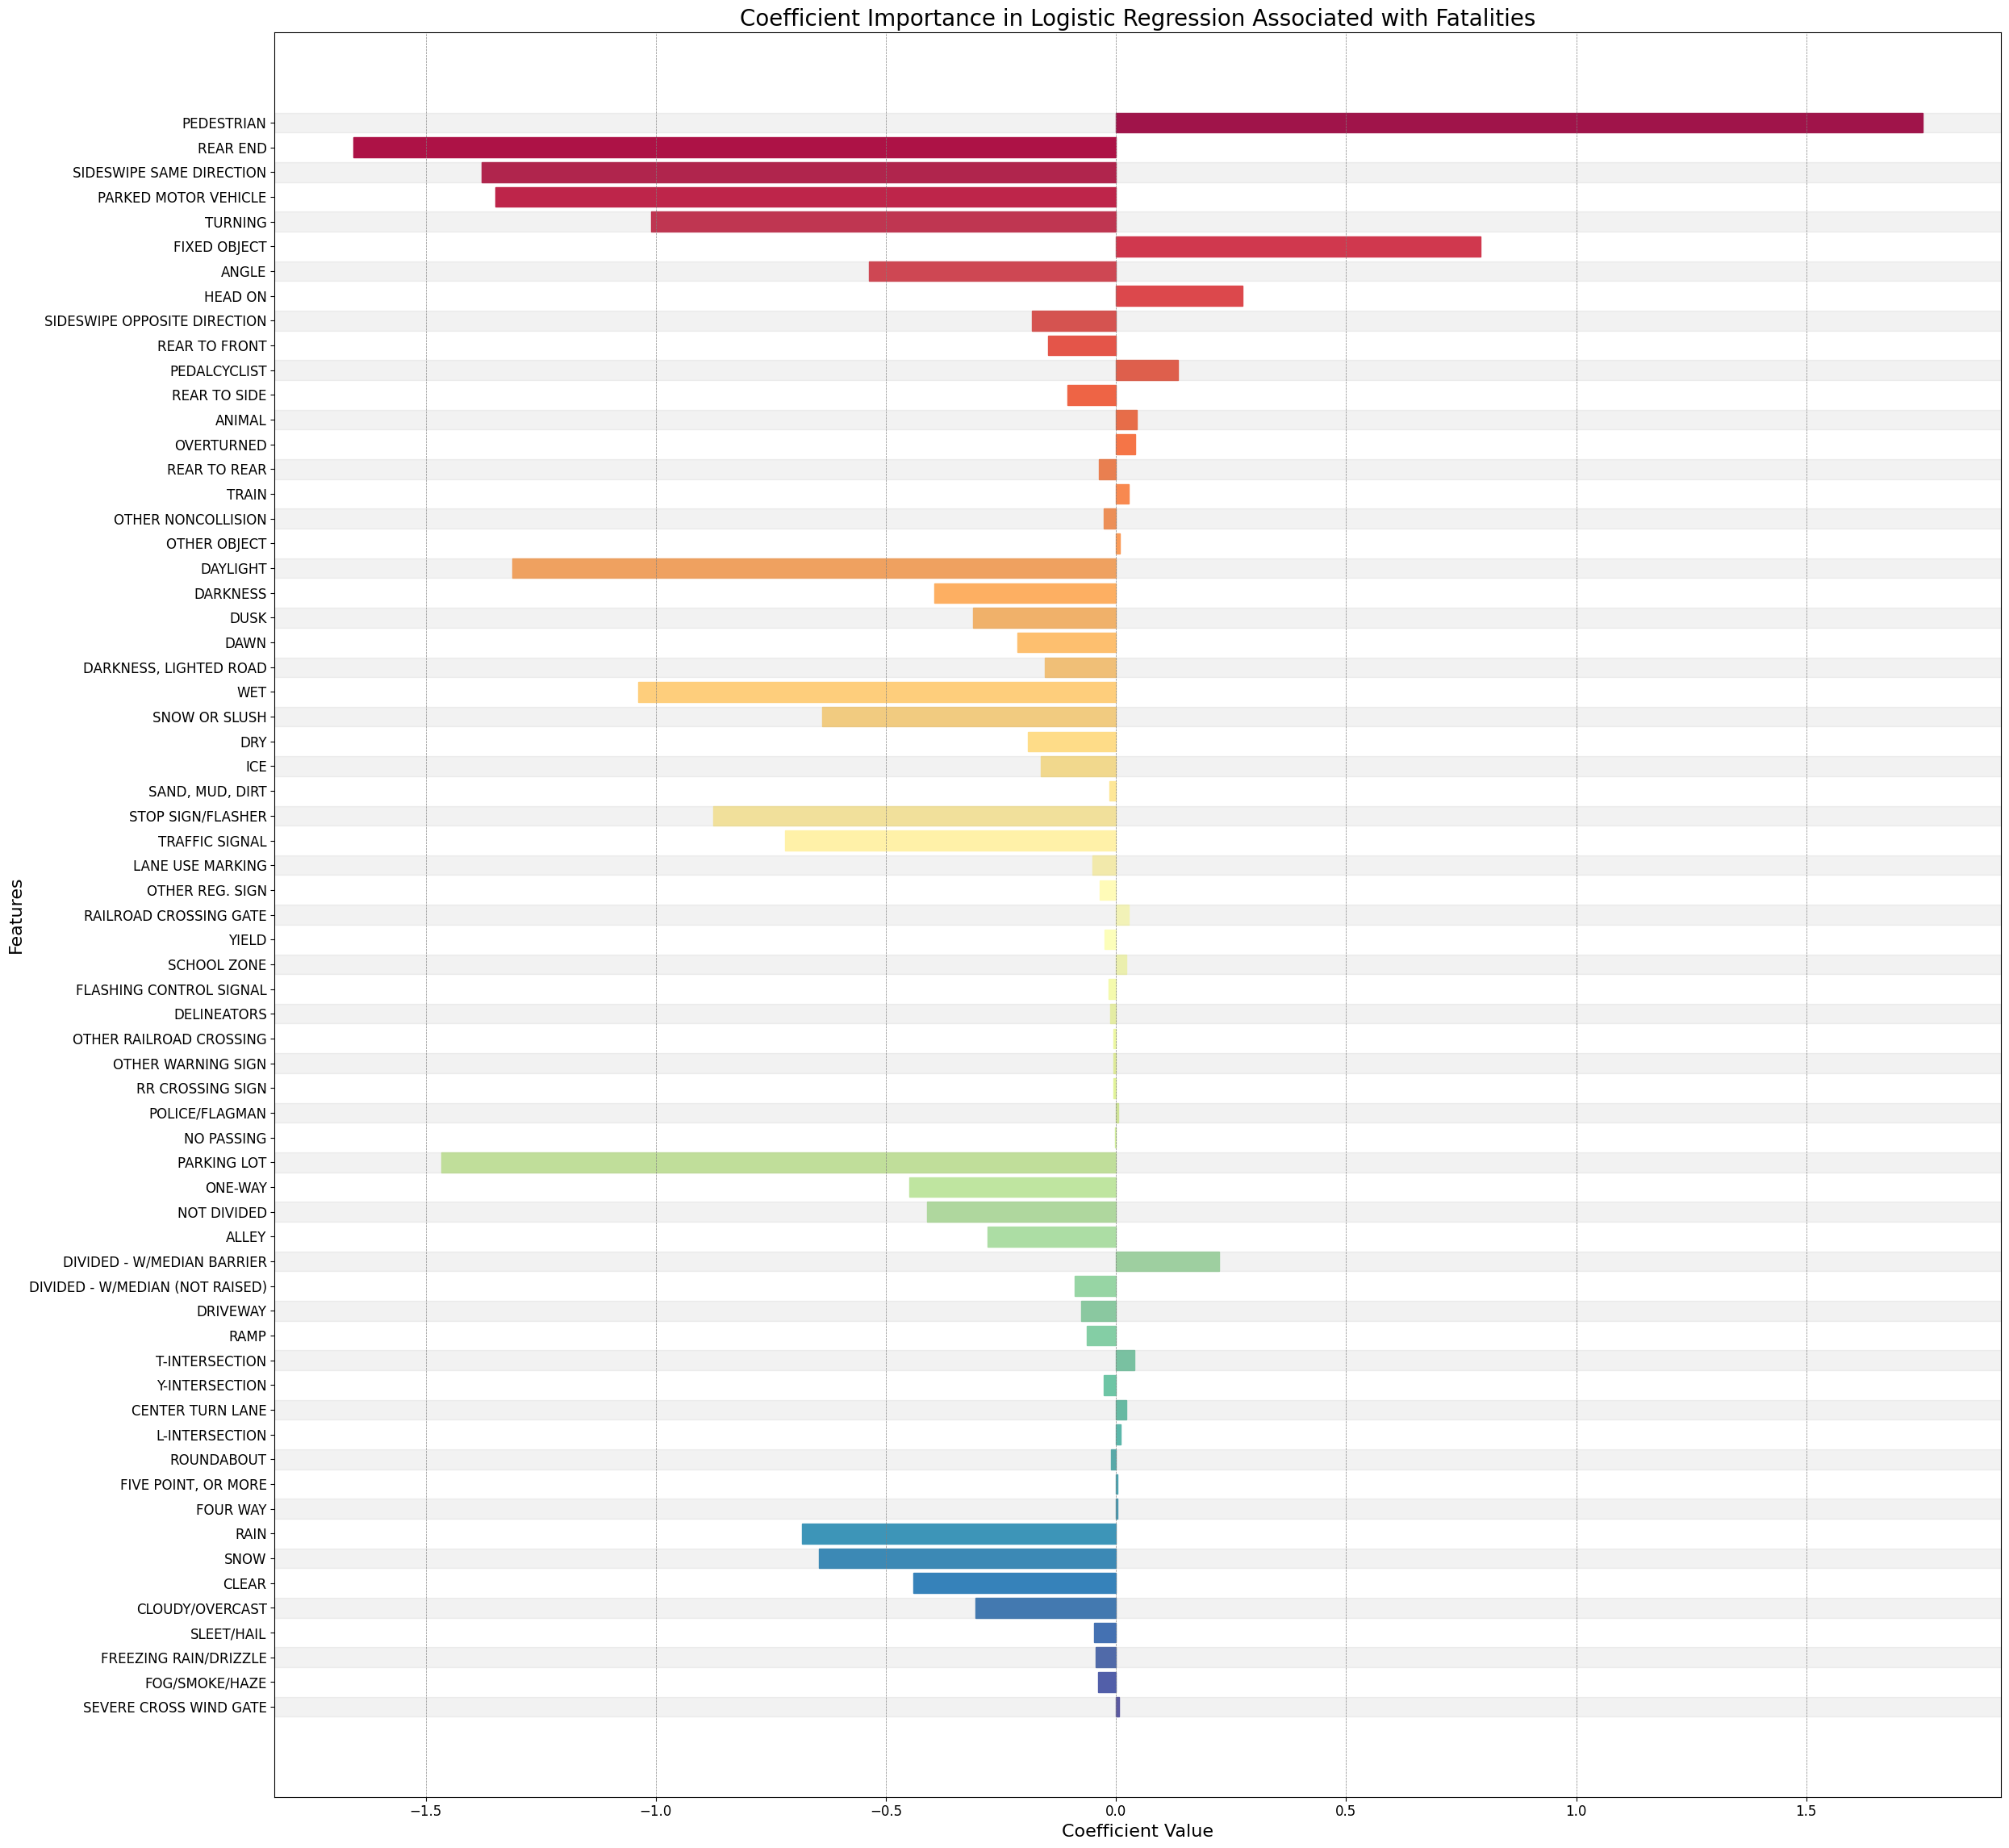

In [32]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore', category=UserWarning)

data = pd.read_csv('../data/chicago.csv')

# Define the binary outcome variable based on any 'INJURIES_FATAL'
data['Fatal'] = data['INJURIES_FATAL'] > 0

# Predictors and outcome variable
predictors = ['POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'TRAFFIC_CONTROL_DEVICE',
              'DEVICE_CONDITION', 'ROADWAY_SURFACE_COND', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE']
outcome = 'Fatal'

data_predictors = pd.get_dummies(data[predictors], drop_first=False)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_predictors, data[outcome], test_size=0.2, random_state=42)

X_train.shape, X_test.shape


# Init and fit the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate classification report (precision, recall, f1-score)
performance = classification_report(y_test, y_pred, output_dict=True)

# Performance metrics
accuracy = performance['accuracy']
precision = performance['weighted avg']['precision']
recall = performance['weighted avg']['recall']
f1_score = performance['weighted avg']['f1-score']

print('accuracy:', accuracy, 'precision:', precision, 'recall:', recall, 'f1 score:', f1_score)
'''
for var in ['POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'TRAFFIC_CONTROL_DEVICE',
              'DEVICE_CONDITION', 'ROADWAY_SURFACE_COND', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE']:
    print(f"Baseline for {var}: {sorted(data[var].unique())[0]}")
'''



# Coefficients from the logistic regression model
coefficients = model.coef_[0]

# Matching coefficients with their corresponding features
feature_names = X_train.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Column 'Type' to indicate the category of each feature
coef_df['Type'] = coef_df['Feature'].apply(lambda x: x.split('_')[0])

# Sort the coefficients within each 'Type' by their absolute values
coef_df['abs_coefficient'] = coef_df['Coefficient'].abs()
coef_df.sort_values(['Type', 'abs_coefficient'], ascending=[True, False], inplace=True)

# Drop helper column since it's no longer needed 
coef_df.drop('abs_coefficient', axis=1, inplace=True)

plt.figure(figsize=(25, 23))

# Apply a lambda function to remove everything before and including the last underscore for each element
coef_df['Simplified_Feature'] = coef_df['Feature'].apply(lambda x: x.rsplit('_', 1)[-1])


# Drop uninteresting features or features that are not interpretable
coef_df.drop(coef_df[coef_df['Simplified_Feature'] == 'UNKNOWN'].index, inplace=True)
coef_df.drop(coef_df[coef_df['Simplified_Feature'] == 'OTHER'].index, inplace=True)
coef_df.drop(coef_df[coef_df['Simplified_Feature'] == 'UNKNOWN INTERSECTION TYPE'].index, inplace=True)
coef_df.drop(coef_df[coef_df['Simplified_Feature'] == 'PEDESTRIAN CROSSING SIGN'].index, inplace=True)
coef_df.drop(coef_df[coef_df['Simplified_Feature'] == 'BICYCLE CROSSING SIGN'].index, inplace=True)
coef_df.drop(coef_df[coef_df['Simplified_Feature'] == 'FUNCTIONING PROPERLY'].index, inplace=True)
coef_df.drop(coef_df[coef_df['Simplified_Feature'] == 'NO CONTROLS'].index, inplace=True)
coef_df.drop(coef_df[coef_df['Simplified_Feature'] == 'FUNCTIONING IMPROPERLY'].index, inplace=True)
coef_df.drop(coef_df[coef_df['Simplified_Feature'] == 'NOT FUNCTIONING'].index, inplace=True)
coef_df.drop(coef_df[coef_df['Simplified_Feature'] == 'WORN REFLECTIVE MATERIAL'].index, inplace=True)
coef_df.drop(coef_df[coef_df['Simplified_Feature'] == 'MISSING'].index, inplace=True)
coef_df.drop(coef_df[coef_df['Simplified_Feature'] == 'LIMIT'].index, inplace=True)
coef_df.drop(coef_df[coef_df['Simplified_Feature'] == 'BLOWING SAND, SOIL, DIRT'].index, inplace=True)
coef_df.drop(coef_df[coef_df['Simplified_Feature'] == 'BLOWING SNOW'].index, inplace=True)
coef_df.drop(coef_df[coef_df['Simplified_Feature'] == 'NOT REPORTED'].index, inplace=True)
coef_df.drop(coef_df[coef_df['Simplified_Feature'] == 'TRAFFIC ROUTE'].index, inplace=True)

# Barplot info
barplot = sns.barplot(
    x='Coefficient', 
    y='Simplified_Feature', 
    data=coef_df, 
    color='blue',
    err_kws={'linewidth': 0}
)

palette = sns.color_palette("Spectral", n_colors=len(coef_df))
for i, bar in enumerate(barplot.patches):
    bar.set_color(palette[i])




# Set title and labels
plt.title('Coefficient Importance in Logistic Regression Associated with Fatalities', fontsize=20)
plt.xlabel('Coefficient Value', fontsize=16)
plt.ylabel('Features', fontsize=16)

# Zebra striping in the background
for i, bar in enumerate(barplot.patches):
    if i % 2 == 0:
        plt.axhspan(i - 0.4, i + 0.4, color='grey', alpha=0.1)

# Extend lines across the plot for readabiliity
plt.grid(True, which='major', linestyle='--', linewidth=0.5, color='grey', axis='x')

# Increase label size for readability
barplot.set_yticklabels(barplot.get_yticklabels(), fontsize=12)
plt.xticks(fontsize=12)

plt.tight_layout()

plt.show()
del data

The data shows that incidents involving pedestrians are most likely to be fatal. Traffic accidents associated with fixed objects are also highly associated with fatalities. Looking at the analysis, an accident that occurs head on is far more likely to be associated with fatalities than rear ends. We can see that daylight conditions are about 2-3 times less likely to be associated with fatalities than other lighting conditions. The analysis of the data has given us insight into what is or is not often associated with fatalities. 

# **4.3) Machine Learning Analysis 3 (by Erica Hammond)**

### Hypothesis 3:
Since we learned that age and gender were not enough information to determine much of anything, we collect even more data about the drivers to conduct analysis.
In our EDA we learned that age 

First we will attempt a classification ML analysis to focus on predicting a categorical outome. Since we are discussing crash severity, let's assume the target is to predict whether an accident resulted in fatalities (binary classification). This will be a basic report.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#doing this again for ease
people_df = pd.read_csv('../data/chicago_people.csv', low_memory=False)
crashes_df = pd.read_csv('../data/chicago.csv', low_memory=False)


data = pd.merge(crashes_df, people_df, on='CRASH_RECORD_ID')
data['FATAL_ACCIDENT'] = data['INJURIES_FATAL'] > 0 # make target binary


features = ['AGE', 'SEX', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION', 
            'SAFETY_EQUIPMENT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 
            'ROADWAY_SURFACE_COND', 'ROAD_DEFECT']

X = data[features]
y = data['FATAL_ACCIDENT']

# preprocessing transformers
preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='median'), ['AGE']),
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['SEX', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION', 
                                                     'SAFETY_EQUIPMENT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 
                                                     'ROADWAY_SURFACE_COND', 'ROAD_DEFECT'])
])

# model = RandomForestClassifier(n_estimators=100, random_state=0)
model = RandomForestClassifier(n_estimators=10, random_state=0)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    356102
        True       0.12      0.02      0.03       516

    accuracy                           1.00    356618
   macro avg       0.56      0.51      0.52    356618
weighted avg       1.00      1.00      1.00    356618



We can see from the simple report that the dataset is imbalanced and thus has a difficult time predicting fatal accidents where it does well predicting non-fatal accidents. Further analysis is required.

Using logistic regression, we will do an analysis of which driver features are and aren't associated with fatalities.

In [5]:
#just doing imports here for ease of testing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


data = pd.merge(crashes_df, people_df, on='CRASH_RECORD_ID')

data['FATAL_ACCIDENT'] = data['INJURIES_FATAL'] > 0
features = ['AGE', 'SEX', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION', 
            'SAFETY_EQUIPMENT']

X = data[features]
y = data['FATAL_ACCIDENT']

categorical_features = ['SEX', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION', 'SAFETY_EQUIPMENT']
numerical_features = ['AGE']

# categorical data: impute missing values then apply one-hot encoding [placeholder method?]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# numerical data: impute missing values then scale [placeholder method?]
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# column transformer to apply the transformations to feature types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = LogisticRegression(max_iter=1000)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# evaluate (zero_division parameter set to 0)
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

# transform feature names to match transformed feature space
feature_names = (pipeline.named_steps['preprocessor']
                 .transformers_[1][1]
                 .named_steps['onehot']
                 .get_feature_names_out(input_features=categorical_features))
feature_names = np.concatenate([numerical_features, feature_names])

coefficients = pipeline.named_steps['classifier'].coef_[0]

feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# sort by absolute value
feature_importance['abs_coef'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='abs_coef', ascending=False)

print(feature_importance[['Feature', 'Coefficient']])

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    356102
        True       0.00      0.00      0.00       516

    accuracy                           1.00    356618
   macro avg       0.50      0.50      0.50    356618
weighted avg       1.00      1.00      1.00    356618

                                              Feature  Coefficient
49                          PHYSICAL_CONDITION_NORMAL    -2.143663
68                  SAFETY_EQUIPMENT_SAFETY BELT USED    -2.132242
3                                               SEX_X    -1.505463
33                         DRIVER_VISION_NOT OBSCURED    -1.053657
71                     SAFETY_EQUIPMENT_USAGE UNKNOWN    -1.050408
38                              DRIVER_VISION_UNKNOWN    -1.014554
52                         PHYSICAL_CONDITION_UNKNOWN    -0.921751
10                 DRIVER_ACTION_FOLLOWED TOO CLOSELY    -0.903548
51                  PHYSICAL_CONDITION_REMOVED BY EMS     0.870344
53 

Visualisation:

/tmp/ipykernel_17202/3974431928.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Coefficient', y='Feature', palette='viridis') #cause it's pretty


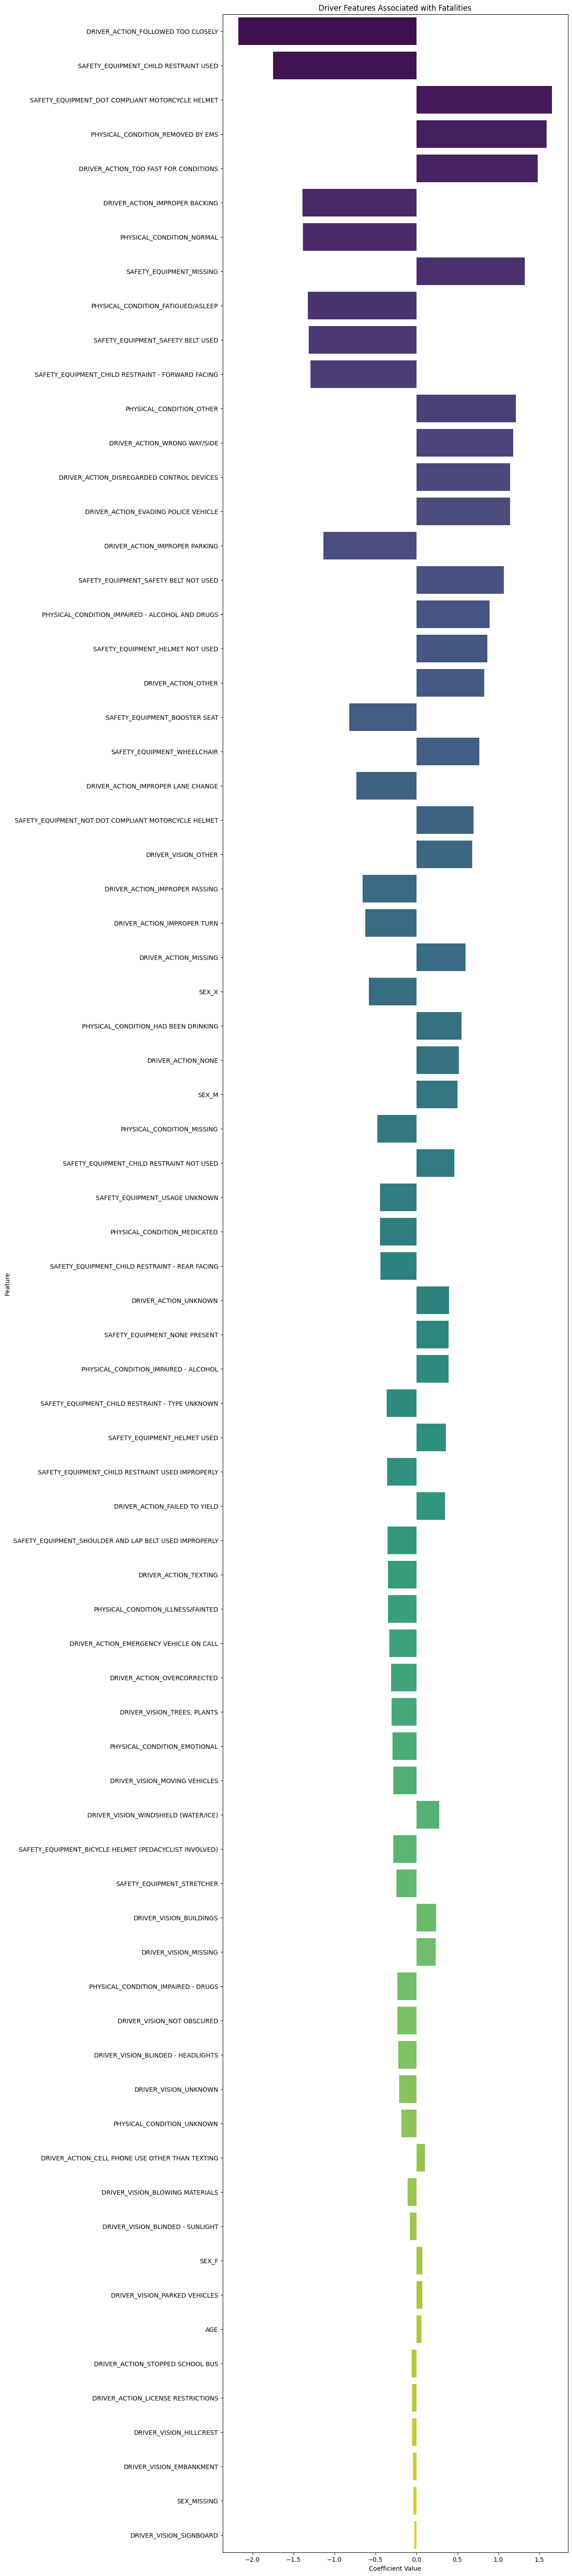

In [6]:
# doing it by hand because I'm a loser
coefficients = [-2.172562, -1.749500, 1.657046, 1.588171, 1.482543,
                -1.388517, -1.385384, 1.323817, -1.323065, -1.313382,
                -1.290025, 1.216118, 1.179354, 1.141898, 1.141599,
                -1.132097, 1.070336, 0.891513, 0.866937, 0.827051,
                -0.819595, 0.769266, -0.731878, 0.696445, 0.681458,
                -0.653373, -0.622513, 0.602121, -0.580945, 0.551983,
                0.520920, 0.502936, -0.476110, 0.465231, -0.444098,
                -0.441187, -0.436498, 0.401559, 0.393820, 0.393278,
                -0.362453, 0.359940, -0.356127, 0.352408, -0.349893,
                -0.348188, -0.346168, -0.330561, -0.305537, -0.301468,
                -0.293280, -0.280443, 0.279616, -0.278684, -0.241849,
                0.239271, 0.235789, -0.233694, -0.230985, -0.222408,
                -0.210743, -0.181442, 0.105291, -0.105234, -0.077296,
                0.074417, 0.070846, 0.059855, -0.056478, -0.052306,
                -0.051821, -0.043449, -0.035675, -0.022399]

features = [
    "DRIVER_ACTION_FOLLOWED TOO CLOSELY", "SAFETY_EQUIPMENT_CHILD RESTRAINT USED",
    "SAFETY_EQUIPMENT_DOT COMPLIANT MOTORCYCLE HELMET", "PHYSICAL_CONDITION_REMOVED BY EMS",
    "DRIVER_ACTION_TOO FAST FOR CONDITIONS", "DRIVER_ACTION_IMPROPER BACKING",
    "PHYSICAL_CONDITION_NORMAL", "SAFETY_EQUIPMENT_MISSING", "PHYSICAL_CONDITION_FATIGUED/ASLEEP",
    "SAFETY_EQUIPMENT_SAFETY BELT USED", "SAFETY_EQUIPMENT_CHILD RESTRAINT - FORWARD FACING",
    "PHYSICAL_CONDITION_OTHER", "DRIVER_ACTION_WRONG WAY/SIDE", "DRIVER_ACTION_DISREGARDED CONTROL DEVICES",
    "DRIVER_ACTION_EVADING POLICE VEHICLE", "DRIVER_ACTION_IMPROPER PARKING", "SAFETY_EQUIPMENT_SAFETY BELT NOT USED",
    "PHYSICAL_CONDITION_IMPAIRED - ALCOHOL AND DRUGS", "SAFETY_EQUIPMENT_HELMET NOT USED",
    "DRIVER_ACTION_OTHER", "SAFETY_EQUIPMENT_BOOSTER SEAT", "SAFETY_EQUIPMENT_WHEELCHAIR",
    "DRIVER_ACTION_IMPROPER LANE CHANGE", "SAFETY_EQUIPMENT_NOT DOT COMPLIANT MOTORCYCLE HELMET",
    "DRIVER_VISION_OTHER", "DRIVER_ACTION_IMPROPER PASSING", "DRIVER_ACTION_IMPROPER TURN",
    "DRIVER_ACTION_MISSING", "SEX_X", "PHYSICAL_CONDITION_HAD BEEN DRINKING",
    "DRIVER_ACTION_NONE", "SEX_M", "PHYSICAL_CONDITION_MISSING", "SAFETY_EQUIPMENT_CHILD RESTRAINT NOT USED",
    "SAFETY_EQUIPMENT_USAGE UNKNOWN", "PHYSICAL_CONDITION_MEDICATED", "SAFETY_EQUIPMENT_CHILD RESTRAINT - REAR FACING",
    "DRIVER_ACTION_UNKNOWN", "SAFETY_EQUIPMENT_NONE PRESENT", "PHYSICAL_CONDITION_IMPAIRED - ALCOHOL",
    "SAFETY_EQUIPMENT_CHILD RESTRAINT - TYPE UNKNOWN", "SAFETY_EQUIPMENT_HELMET USED",
    "SAFETY_EQUIPMENT_CHILD RESTRAINT USED IMPROPERLY", "DRIVER_ACTION_FAILED TO YIELD",
    "SAFETY_EQUIPMENT_SHOULDER AND LAP BELT USED IMPROPERLY", "DRIVER_ACTION_TEXTING",
    "PHYSICAL_CONDITION_ILLNESS/FAINTED", "DRIVER_ACTION_EMERGENCY VEHICLE ON CALL",
    "DRIVER_ACTION_OVERCORRECTED", "DRIVER_VISION_TREES, PLANTS", "PHYSICAL_CONDITION_EMOTIONAL",
    "DRIVER_VISION_MOVING VEHICLES", "DRIVER_VISION_WINDSHIELD (WATER/ICE)", "SAFETY_EQUIPMENT_BICYCLE HELMET (PEDACYCLIST INVOLVED)",
    "SAFETY_EQUIPMENT_STRETCHER", "DRIVER_VISION_BUILDINGS", "DRIVER_VISION_MISSING",
    "PHYSICAL_CONDITION_IMPAIRED - DRUGS", "DRIVER_VISION_NOT OBSCURED", "DRIVER_VISION_BLINDED - HEADLIGHTS",
    "DRIVER_VISION_UNKNOWN", "PHYSICAL_CONDITION_UNKNOWN", "DRIVER_ACTION_CELL PHONE USE OTHER THAN TEXTING",
    "DRIVER_VISION_BLOWING MATERIALS", "DRIVER_VISION_BLINDED - SUNLIGHT", "SEX_F",
    "DRIVER_VISION_PARKED VEHICLES", "AGE", "DRIVER_ACTION_STOPPED SCHOOL BUS",
    "DRIVER_ACTION_LICENSE RESTRICTIONS", "DRIVER_VISION_HILLCREST", "DRIVER_VISION_EMBANKMENT",
    "SEX_MISSING", "DRIVER_VISION_SIGNBOARD"
]
            
feature_importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

feature_importance_df['abs_coef'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='abs_coef', ascending=False)

plt.figure(figsize=(10, len(features)))  # Adjust the figure size to fit all features
sns.barplot(data=feature_importance_df, x='Coefficient', y='Feature', palette='viridis') #cause it's pretty

plt.title('Driver Features Associated with Fatalities')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

We can now deetermine that certain driver actions, physical conditions, and the use/absence of safety equipment are significantly associated with the occurence of fatal accidents.
- Some driver actions and the use of safety equipment are NEGATIVELY ASSOCIATED with fatalities.
- Other conditions, such as the absence of safety equipment are POSITIVELY ASSOCIATED with fatalities.
    However, this information must be used within context. For example, the positive association of DOT compliant motorcycle helmets with fatalities does not necessarily suggest that
    the helmets are contributing to fatalities, but is likely a reflection of the higher liklihood of fatality in motorcycle accidents.

At times, the data may reflect correlations, not causation. The presence of a factor in a fatality does not necessarily mean it caused the fatality.
Overall, to prevent fatalities, the data suggests improvements in the conditions of drivers, promoting the use of safety equipment, and addressing dangerous driving actions.

# **4.4) Machine Learning analysis 4 (by Junha Liu)**

### Hypothesis 4:  
Using geographical data (latitude and longitude), we identified clusters of high-accident locations. We used the DBSCAN (Density-based spatial clustering of applications with noise) algorithm to find traffic crash hotspots, which are areas with a high concentration of traffic crashes. Targeted interventions can then be implemented in these hotspots, such as improved signage or road redesigns.

In [7]:
crashes_df = pd.read_csv('../data/chicago.csv', low_memory=False)

In [8]:
df_filtered = crashes_df.dropna(subset=['LATITUDE', 'LONGITUDE'])

In [ ]:
import folium
from folium.plugins import HeatMap

map_center = [41.892697, -87.631706]
map_ = folium.Map(location=map_center, zoom_start=10)

#Heatmap
HeatMap(data=df_filtered[['LATITUDE', 'LONGITUDE']], radius=12).add_to(map_)

# Display
map_.save('chicago_crash_heatmap.html')

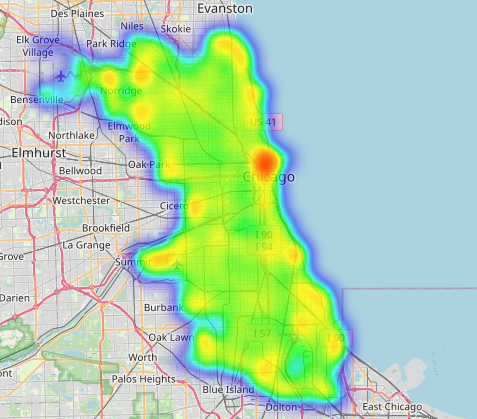

In [ ]:
from PIL import Image
Image.open('chicago_crash_heatmap.png')

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardizing data for DBSCAN
coords = df_filtered[['LATITUDE', 'LONGITUDE']]
coords = StandardScaler().fit_transform(coords)

# Apply DBSCAN
db = DBSCAN(eps=0.0001, min_samples=200).fit(coords) 
cluster_labels = db.labels_

In [ ]:
# Add the cluster information to the original DF
df_filtered.loc[:, 'cluster'] = cluster_labels
df_clustered = df_filtered[df_filtered['cluster'] != -1]

#Heatmap
map_center = [41.892697, -87.631706]
map_hotspots = folium.Map(location=map_center, zoom_start=10)
HeatMap(data=df_clustered[['LATITUDE', 'LONGITUDE']], radius=20).add_to(map_hotspots)

map_hotspots.save('chicago_crash_hotspots.html')


In [ ]:
del crashes_df, df_filtered, df_clustered

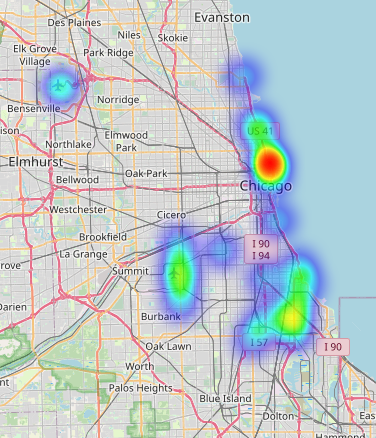

In [ ]:
Image.open('chicago_crash_hotspots.png')

In our analysis, we used geographical location coordinates (latitude and longitude) from crash data. Our findings indicate significant clusters of traffic incidents around major landmarks and areas, specifically near O'Hare and Midway airports, along the South Side of Chicago, and in the North Side area close to the Magnificent Mile and Navy Pier. These results suggest that factors related to high traffic volumes, urban density, and possibly airport-related traffic flows might significantly contribute to the increased crash occurrences. This analysis highlights the critical need for targeted traffic safety and urban planning interventions in identified hotspots to mitigate crash risks.

# **4.5) Machine Learning analysis 5 (by Prit Patel)**

### Hypothesis 5:
Can we predict if the accident resulted in a fatal injury with a few various factors?

0: DUSK
1: DARKNESS, LIGHTED ROAD
2: DAYLIGHT
3: DARKNESS
4: UNKNOWN
5: DAWN
0: CLEAR
1: SNOW
2: RAIN
3: UNKNOWN
4: CLOUDY/OVERCAST
5: FOG/SMOKE/HAZE
6: BLOWING SNOW
7: FREEZING RAIN/DRIZZLE
8: OTHER
9: SEVERE CROSS WIND GATE
10: SLEET/HAIL
11: BLOWING SAND, SOIL, DIRT
0: INJURY AND / OR TOW DUE TO CRASH
1: NO INJURY / DRIVE AWAY
0: NO DEFECTS
1: UNKNOWN
2: DEBRIS ON ROADWAY
3: OTHER
4: WORN SURFACE
5: SHOULDER DEFECT
6: RUT, HOLES
Testing Accuracy: 0.998842883239533
Training Accuracy: 0.9989200225843301


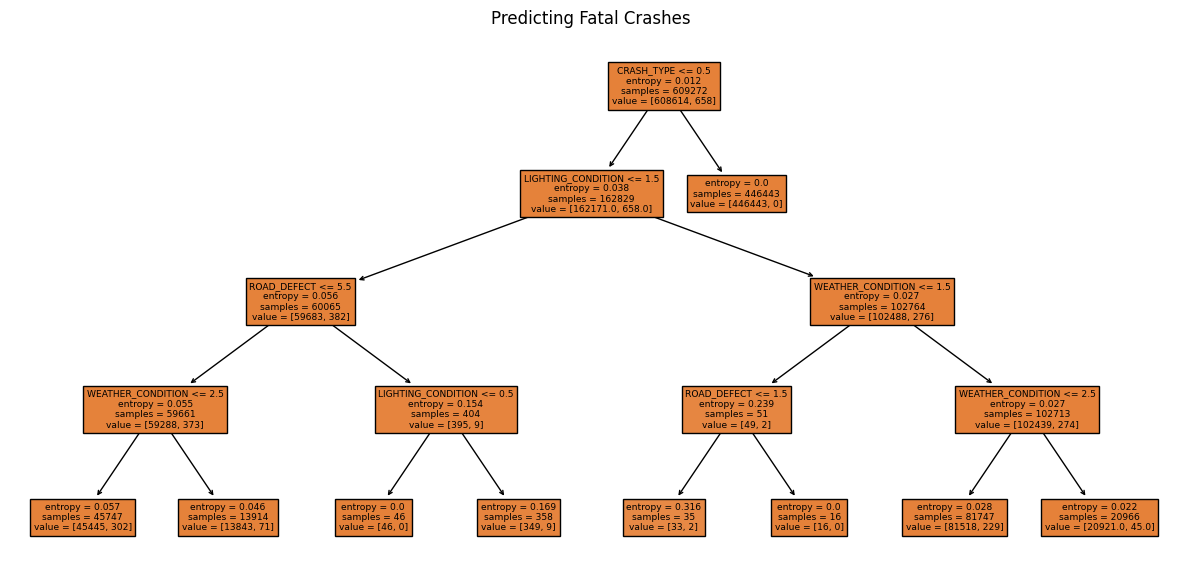

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

traffic_crashes = pd.read_csv('../data/chicago.csv', low_memory=False)

predict = 'MOST_SEVERE_INJURY'
options = ['LIGHTING_CONDITION', 'WEATHER_CONDITION', 'CRASH_TYPE', 'ROAD_DEFECT']
data = traffic_crashes[options + [predict]].copy()

label_encoder = LabelEncoder()
for option in options:
    data[option] = label_encoder.fit_transform(data[option])

    unique_values = traffic_crashes[option].unique()
    for encoded_value, value in enumerate(unique_values):
        print(f"{encoded_value}: {value}")
        
data['MOST_SEVERE_INJURY'] = data['MOST_SEVERE_INJURY'].apply(lambda x: 1 if x == 'FATAL' else 0)

clf = DecisionTreeClassifier(max_depth=4, criterion='entropy')
X_train, X_test, y_train, y_test = train_test_split(data[options], data[predict])
clf.fit(X_train, y_train)

y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)

plt.figure(figsize=(15, 7))
plot_tree(clf, filled=True, feature_names=options)
plt.title("Predicting Fatal Crashes")

print(f"Testing Accuracy: {test_accuracy}")
print(f"Training Accuracy: {train_accuracy}")

del traffic_crashes


### Conclusion:
With an accuracy of 0.99+, this decision tree model is able to predict if a crash will be fatal or not depending on the lighting condition, type of weather, if a tow was required, and if the road has any defects. The columns used for the decision tree to decide 'MOST_SEVERE_INJURY' are 'LIGHTING_CONDITION', 'WEATHER_CONDITION', 'CRASH_TYPE', 'ROAD_DEFECT'.

# **4.6) Machine Learning analysis 6 (by Jackson Weisner)**

### Hypothesis 6:

Are factors such as total injuries, number of units, crash hour, and lane count able to predict if an air bag is deployed?

In [11]:
import pandas as pd
people_df = pd.read_csv('../data/chicago_people.csv', low_memory=False)
crashes_df = pd.read_csv('../data/chicago.csv', low_memory=False)
merged_df = pd.merge(people_df, crashes_df, on='CRASH_RECORD_ID')
del people_df
del crashes_df

/tmp/ipykernel_17202/4179711493.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.fillna(value=fill_map)


Decision Tree Accuracy:  0.9999775855112745


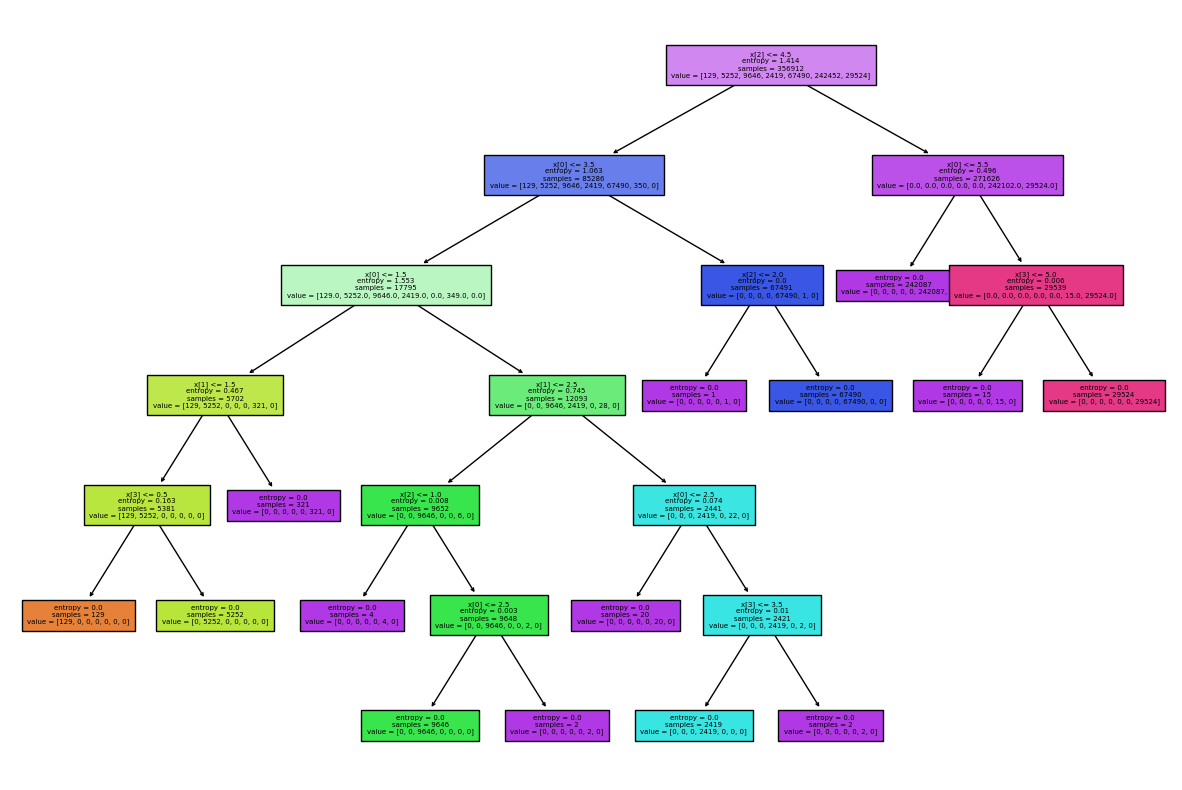

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
feature_list = ['INJURIES_TOTAL', 'NUM_UNITS', 'CRASH_HOUR', 'LANE_CNT']
label = 'AIRBAG_DEPLOYED'
    
full = feature_list.append(label)
data = merged_df[merged_df['LANE_CNT'] < 20][feature_list]

# assign numbers to the states of the label 
i = 0
for state in ['DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)', 'DEPLOYED, COMBINATION', 
              'DEPLOYED, FRONT', 'DEPLOYED, SIDE', 'DEPLOYMENT UNKNOWN', 
              'DID NOT DEPLOY', 'NOT APPLICABLE']:
    data[data[label] == state] = i
    i += 1

# impute missing values using the median
fill_map = {}
for feature in feature_list:
    fill_map[feature] = data[feature].median()

data = data.fillna(value=fill_map)

X = data[feature_list[:-1]]
y = data[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

prediction = model.predict(X_test)
print("Decision Tree Accuracy: ", accuracy_score(y_test, prediction))

fig = plt.figure(figsize=(15,10))
tree.plot_tree(model, fontsize=5, filled=True)

del merged_df

By using a decision tree classifier, with 'INJURIES_TOTAL', 'NUM_UNITS', 'CRASH_HOUR', and 'LANE_CNT' as features, and using 'AIRBAG_DEPLOYED' as the class label, I was able to get an accuracy score of 0.999. This score means the decision tree is able to determine with near perfect accuracy if a crash will have an air bag deployed based on the X features.

# **4.7) Machine Learning analysis 7 (by Erica Hammond)**

### Hypothesis 7:

Are factors such as age, sex, and driver actions able to predict the level of injury?

In [13]:
# imports again for simplicity, don't fight me
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [14]:
# loading dataset again
people_df = pd.read_csv('../data/chicago_people.csv', low_memory=False)

In [15]:

features = ['AGE', 'SEX', 'DRIVER_ACTION']
target = 'INJURY_CLASSIFICATION'

# drop rows where the injury classification is missing
people_df = people_df.dropna(subset=[target])

X = people_df[features]
y = people_df[target]

# preprocessing numerical data
numeric_features = ['AGE']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# preprocessing categorical data
categorical_features = ['SEX', 'DRIVER_ACTION']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# combination
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


# create the model, added class_weight balanced to handle imbalanced data
model = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial', class_weight='balanced')
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))  # had an UndefinedMetricWarning so now we're setting zero_division=0


                          precision    recall  f1-score   support

                   FATAL       0.00      0.61      0.00       225
   INCAPACITATING INJURY       0.01      0.17      0.02      3335
 NO INDICATION OF INJURY       0.97      0.31      0.47    328021
NONINCAPACITATING INJURY       0.07      0.13      0.09     17805
   REPORTED, NOT EVIDENT       0.05      0.38      0.09     10084

                accuracy                           0.30    359470
               macro avg       0.22      0.32      0.13    359470
            weighted avg       0.89      0.30      0.44    359470



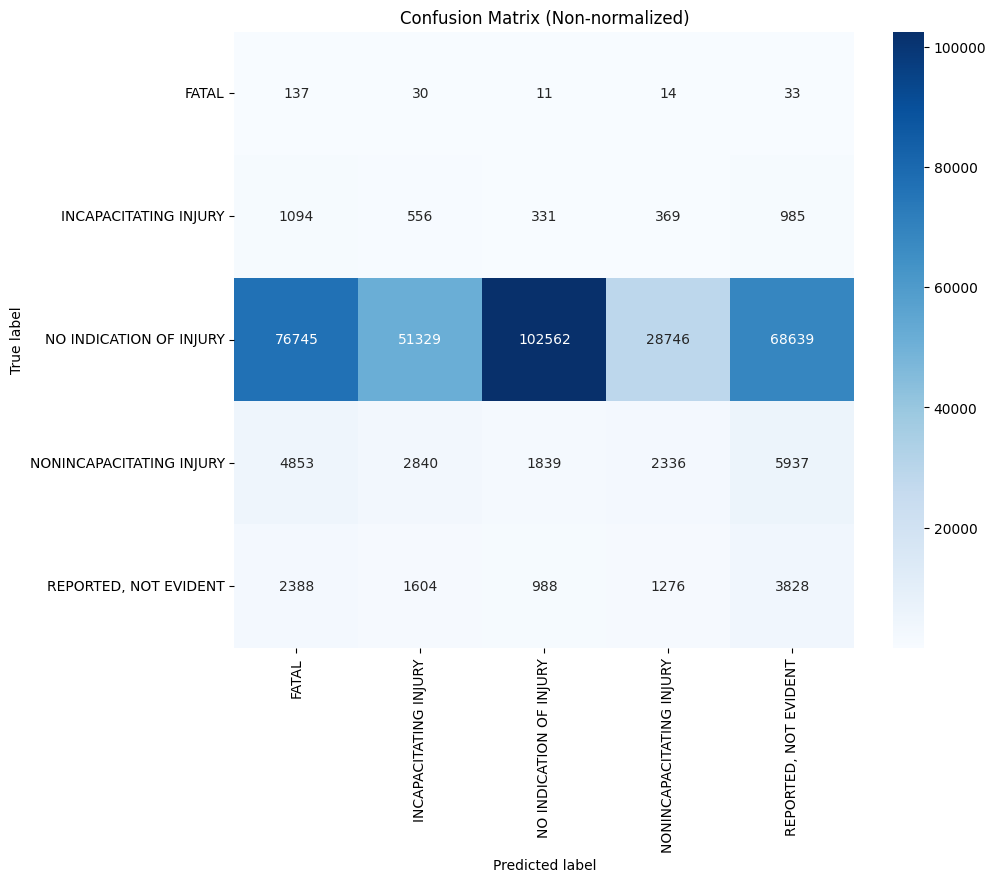

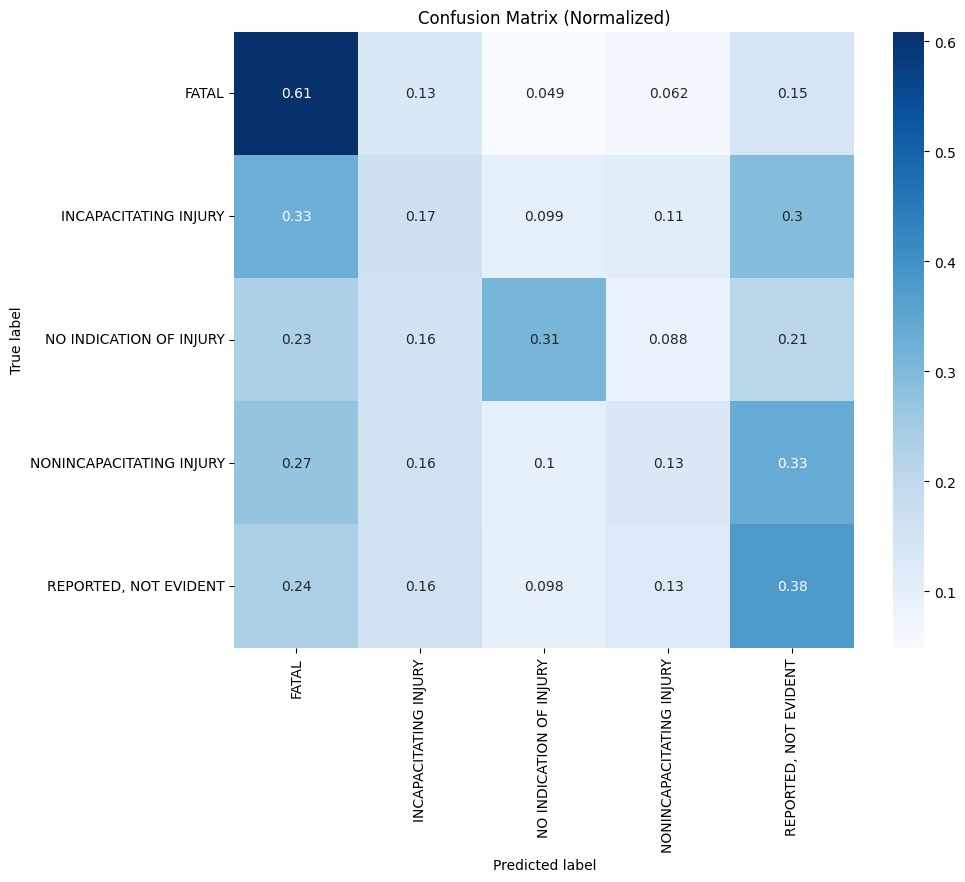

In [16]:
# came back later for the visualization and don't want to run everything again so... NEW IMPORTS
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# calc confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize

# plot non-normalized
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix (Non-normalized)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# plot normalized
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix (Normalized)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

This confusion matrix visual helps to see how many instances of each actual class were correctly predicted by the model versus how many were misclassified.
The normalized version (below) shows the percentage of each true class that was classified into each predicted class, highlighting the model's accuracy per class.

In [17]:
import matplotlib.cm as cm

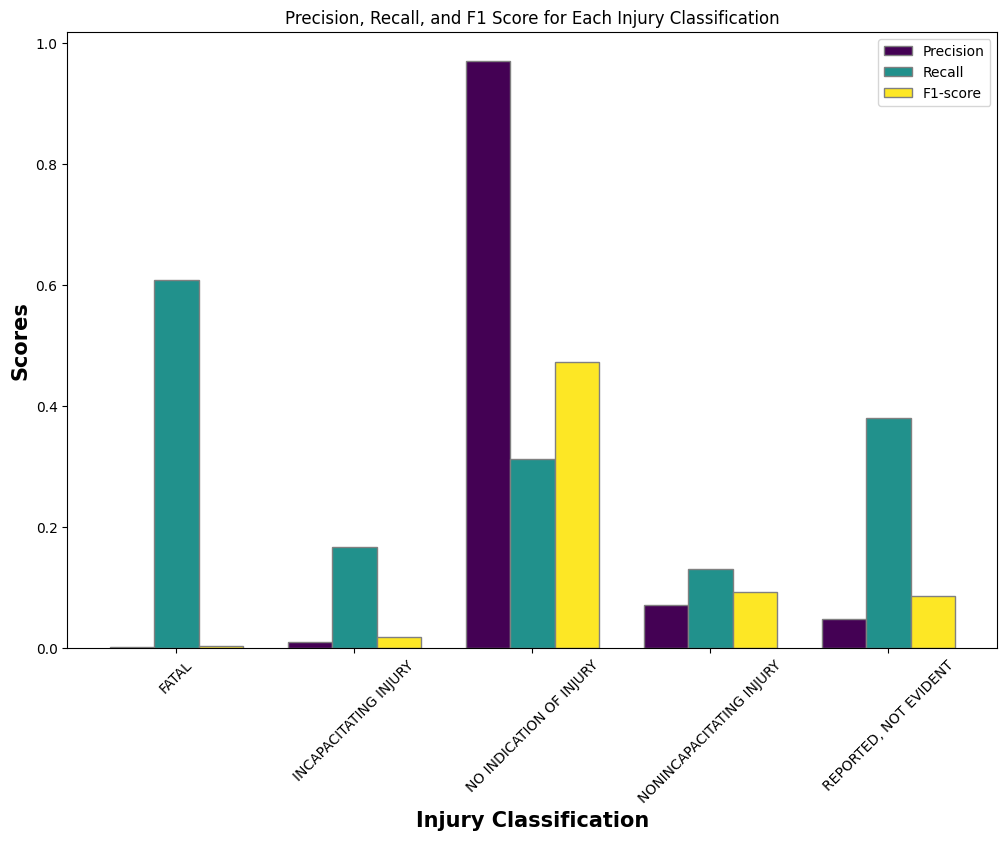

In [18]:
from sklearn.metrics import precision_recall_fscore_support

# calc precision, recall, and F1 score
scores = precision_recall_fscore_support(y_test, y_pred, average=None, labels=model.classes_)

precision, recall, f1, _ = scores
r = range(len(model.classes_))

colors = cm.viridis(np.linspace(0, 1, 3))

# bar plot
plt.figure(figsize=(12, 8))
barWidth = 0.25
plt.bar(r, precision, color=colors[0], width=barWidth, edgecolor='grey', label='Precision')
plt.bar([x + barWidth for x in r], recall, color=colors[1], width=barWidth, edgecolor='grey', label='Recall')
plt.bar([x + barWidth * 2 for x in r], f1, color=colors[2], width=barWidth, edgecolor='grey', label='F1-score')

# xticks middle of the group bars
plt.xlabel('Injury Classification', fontweight='bold', fontsize=15)
plt.ylabel('Scores', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(model.classes_))], model.classes_, rotation=45)
plt.title('Precision, Recall, and F1 Score for Each Injury Classification')
plt.legend()

plt.show()
# the colours are dreadful but I'm tired

This barplot shows precision, recall, and F1-score for each class, providing perspective on the model's performance metrics. 
- Precision measures the accuracy of positive predictions.
- Recall measures the ability of the model to find all the positive samples.
- F1-score is a weighted average of precision and recall.

# **4.8) Machine Learning analysis 8 (by Jackson Weisner)**

Hypothesis: \
Can vehicle year predict if a vehicle will be towed?

In [19]:
import pandas as pd
vehicles_df = pd.read_csv('../data/chicago_vehicles.csv', low_memory=False)

In [20]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score
feature = 'VEHICLE_YEAR' 
label = 'TOWED_I'

# creating the cleaned df 
parsed = vehicles_df[[feature, label]]
parsed = parsed.drop(parsed[(parsed[feature] > 2025) | (parsed[feature] < 1940)].index)

parsed = parsed.dropna()

# the x features
X = parsed[[feature]]

# convert string categories to int
types = parsed[label].unique().tolist()
i = 0
for type in types:
    parsed.loc[parsed[label] == type] = i
    i += 1
y = parsed[label].astype(int)

# split to train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression().fit(X_train, y_train)

prediction = model.predict(X_test)
print(accuracy_score(y_test, prediction))

0.9476726801554869


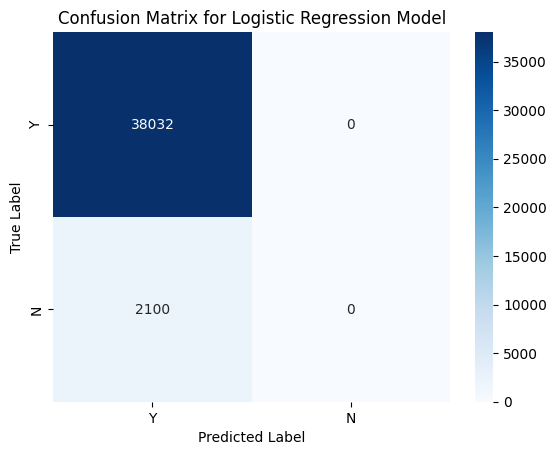

In [21]:
from sklearn.metrics import confusion_matrix

# creating a confusion matrix for the model
conf_matrix = confusion_matrix(y_test, model.predict(X_test), labels=[0, 1])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Y','N'], yticklabels=['Y', 'N'])

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Logistic Regression Model')

del parsed
del vehicles_df

Conclusion: \
\
By using a Logistic Regression model, I found that vehicle year can predict if a vehicle will be towed with 95% accuracy. The confusion matrix shows that there are only 5% of classifications are false positives, meaning vehicle year is a good predictor of if a vehicle will be towed.

# **5.0) Reflection**

The Chicago traffic crash data analysis project has provided numerous insights into the factors contributing to traffic accidents. After narrowing the scope to Chicago to leverage detailed datasets for a more in-depth examination, multiple exploratory data analyses revealed key findings. Several machine-learning models were developed to investigate hypotheses about the predictors of crash severity and other factors involved in accidents, such as the deployment of airbags. The findings from the project indicate that a combination of factors, including driver actions, vehicle characteristics, environmental conditions, and roadway features, play a crucial role in traffic accident outcomes.

The most challenging part of the project was determining which datasets to incorporate and how to combine them to prove or disprove our hypotheses. In our initial EDAs we learned how easy it is to manipulate data to seemingly display particular insights. For example, the relationship between age, gender, and traffic collisions, which appeared to indicate that men of a certain age were more likely to be involved in fatal accidents, when, after analysis, we discovered this was a simplistic point of view that was quickly disproven. Situations like this highlight the importance of leveraging big data and analytical models in understanding and solving urban issues.

If we were to continue working on this project, we would continue to refine the models and begin integrating the results with each other, as well as explore other predictive factors to enhance the accuracy and applicability of the findings. These insights extend beyond academic interest. Analyzing traffic crashes could lead to insights that improve road safety measures, inform policy decisions, or guide urban planning initiatives.